<a href="https://colab.research.google.com/github/hasansin/Data-Mining/blob/master/Data_Mining_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Clustering**

### **1. Perform EDA (Explotary Data Analysis)**


####**1.1 Load dataset**

---

Below code all required modules have been imported and the two data sets for cluster analysis are loaded into the notebook file for the analysis.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean
from scipy.stats import entropy
import plotly.express as pex


data_happy_2015 = pd.read_csv('/content/2015.csv')
data_happy_2019  = pd.read_csv('/content/2019.csv')

####**1.2. Dimension of the dataset**

---

This piece of code, used to understand the number of data records and number of columns in each dataset.


In [ ]:
data_happy_2015.shape

(158, 12)

In [ ]:
data_happy_2019.shape

(156, 9)

As above depict the 2015 data set has 158 data records and 12 columns.
2019 data set has 156 data records and 9 columns.


####**1.3. First fifteen records of dataset**

---

In the below code, the first fifteen records are extracted from each data set to view the data records and to get a brief idea about the dataset.

In [ ]:
data_happy_2015.head(15)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [ ]:
data_happy_2019.head(15)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


####**1.4. Last fifteen records of the dataset**

---

In [ ]:
data_happy_2015.tail(15)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
143,Niger,Sub-Saharan Africa,144,3.845,0.03602,0.06940,0.77265,0.29707,0.47692,0.15639,0.19387,1.87877
144,Cambodia,Southeastern Asia,145,3.819,0.05069,0.46038,0.62736,0.61114,0.66246,0.07247,0.40359,0.98195
145,Tanzania,Sub-Saharan Africa,146,3.781,0.05061,0.28520,1.00268,0.38215,0.32878,0.05747,0.34377,1.38079
146,Madagascar,Sub-Saharan Africa,147,3.681,0.03633,0.20824,0.66801,0.46721,0.19184,0.08124,0.21333,1.85100
147,Central African Republic,Sub-Saharan Africa,148,3.678,0.06112,0.07850,0.00000,0.06699,0.48879,0.08289,0.23835,2.72230
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210


In [ ]:
data_happy_2019.tail(15)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
141,142,Comoros,3.973,0.274,0.757,0.505,0.142,0.275,0.078
142,143,Madagascar,3.933,0.274,0.916,0.555,0.148,0.169,0.041
143,144,Lesotho,3.802,0.489,1.169,0.168,0.359,0.107,0.093
144,145,Burundi,3.775,0.046,0.447,0.380,0.220,0.176,0.180
145,146,Zimbabwe,3.663,0.366,1.114,0.433,0.361,0.151,0.089
146,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110
147,148,Botswana,3.488,1.041,1.145,0.538,0.455,0.025,0.100
148,149,Syria,3.462,0.619,0.378,0.440,0.013,0.331,0.141
149,150,Malawi,3.410,0.191,0.560,0.495,0.443,0.218,0.089
150,151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077


####**1.5. Summary statistics of dataset**

---

In [ ]:
data_happy_2015.describe(include='all')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158,158,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
unique,158,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Switzerland,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,NaN,NaN,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,NaN,NaN,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,NaN,NaN,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,NaN,NaN,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,NaN,NaN,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415


In [ ]:
data_happy_2019.describe(include='all')

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
unique,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Finland,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,78.500000,NaN,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,NaN,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,NaN,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,NaN,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,NaN,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,NaN,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250


####**1.6. Check if null values exist in each column**

---

In [ ]:
data_happy_2015.isnull().sum()

,0
Country,0
Region,0
Happiness Rank,0
Happiness Score,0
Standard Error,0
Economy (GDP per Capita),0
Family,0
Health (Life Expectancy),0
Freedom,0
Trust (Government Corruption),0


In [ ]:
data_happy_2019.isnull().sum()

,0
Overall rank,0
Country or region,0
Score,0
GDP per capita,0
Social support,0
Healthy life expectancy,0
Freedom to make life choices,0
Generosity,0
Perceptions of corruption,0


####**1.7. Feature Correlation Matrix - numerical data**


---



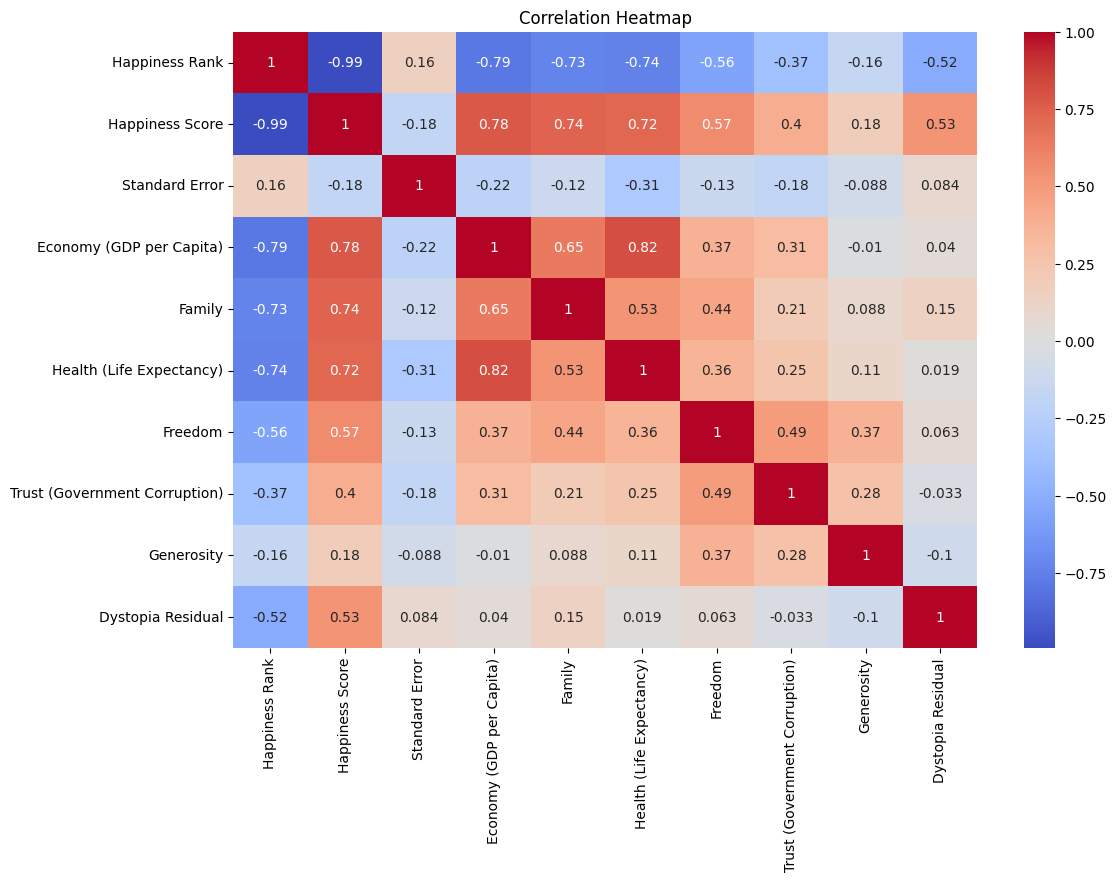

In [ ]:
numeric_cols_2015 = data_happy_2015.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, 8))
sns.heatmap(data_happy_2015[numeric_cols_2015].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

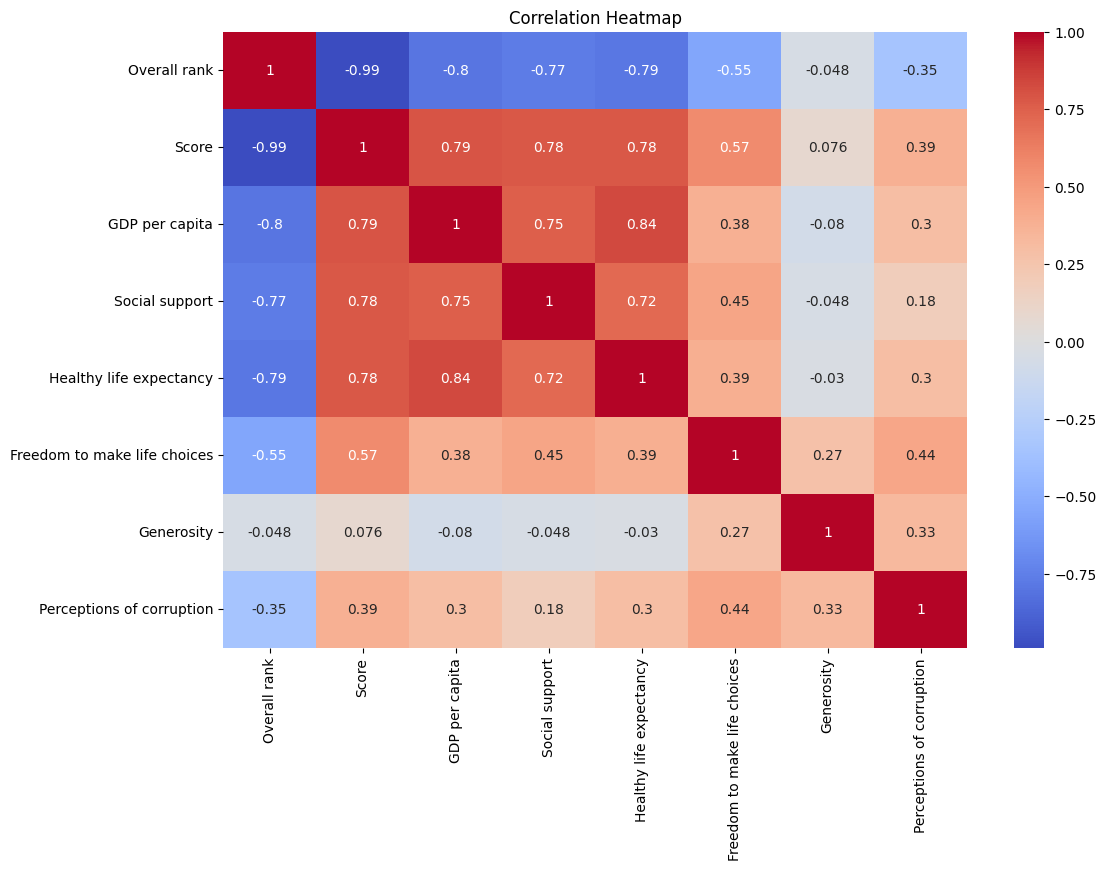

In [ ]:
numeric_cols_2019 = data_happy_2019.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, 8))

sns.heatmap(data_happy_2019[numeric_cols_2019].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**1.8. Numerical features in boxplot**


---



<ipython-input-15-f4aad9a0cae8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  databoxplot_2015['Happiness Rank'] = databoxplot_2015['Happiness Rank']/100
<ipython-input-15-f4aad9a0cae8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  databoxplot_2015['Happiness Score'] = databoxplot_2015['Happiness Score']/10


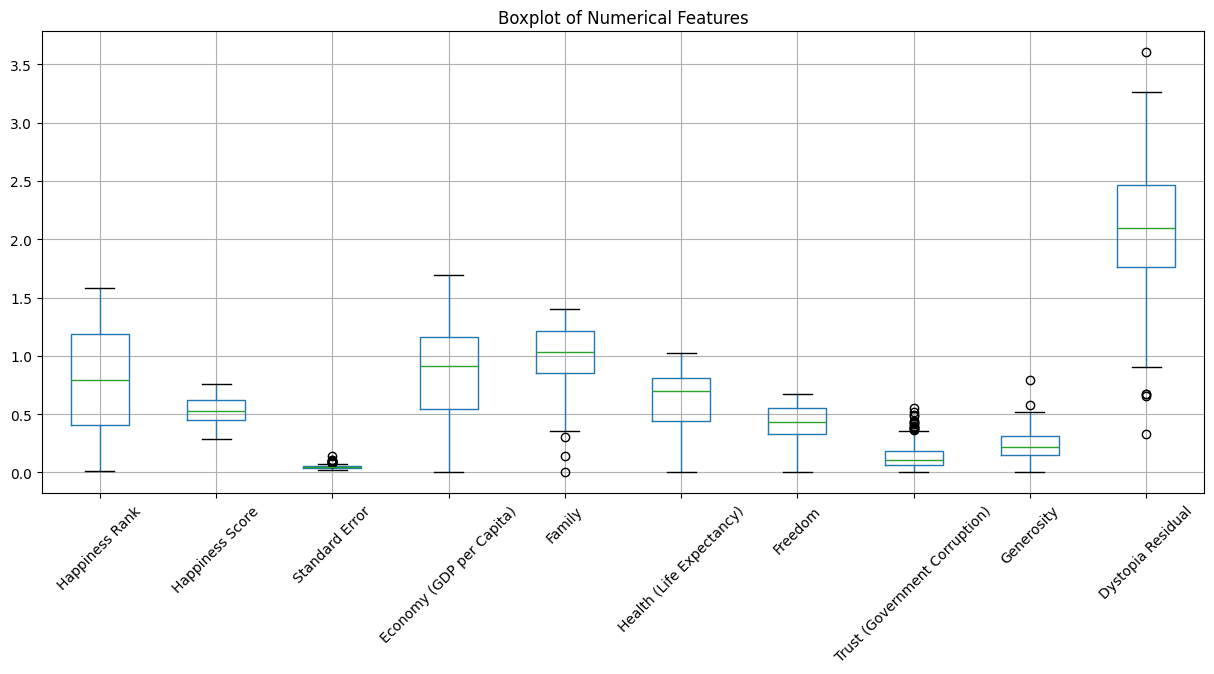

In [ ]:

databoxplot_2015 = data_happy_2015[numeric_cols_2015]
databoxplot_2015['Happiness Rank'] = databoxplot_2015['Happiness Rank']/100
databoxplot_2015['Happiness Score'] = databoxplot_2015['Happiness Score']/10
boxplots_2015 = databoxplot_2015.boxplot(figsize=(15, 6))
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

<ipython-input-16-334ae7a74623>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  databoxplot_2019['Overall rank'] = databoxplot_2019['Overall rank']/100
<ipython-input-16-334ae7a74623>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  databoxplot_2019['Score'] = databoxplot_2019['Score']/10


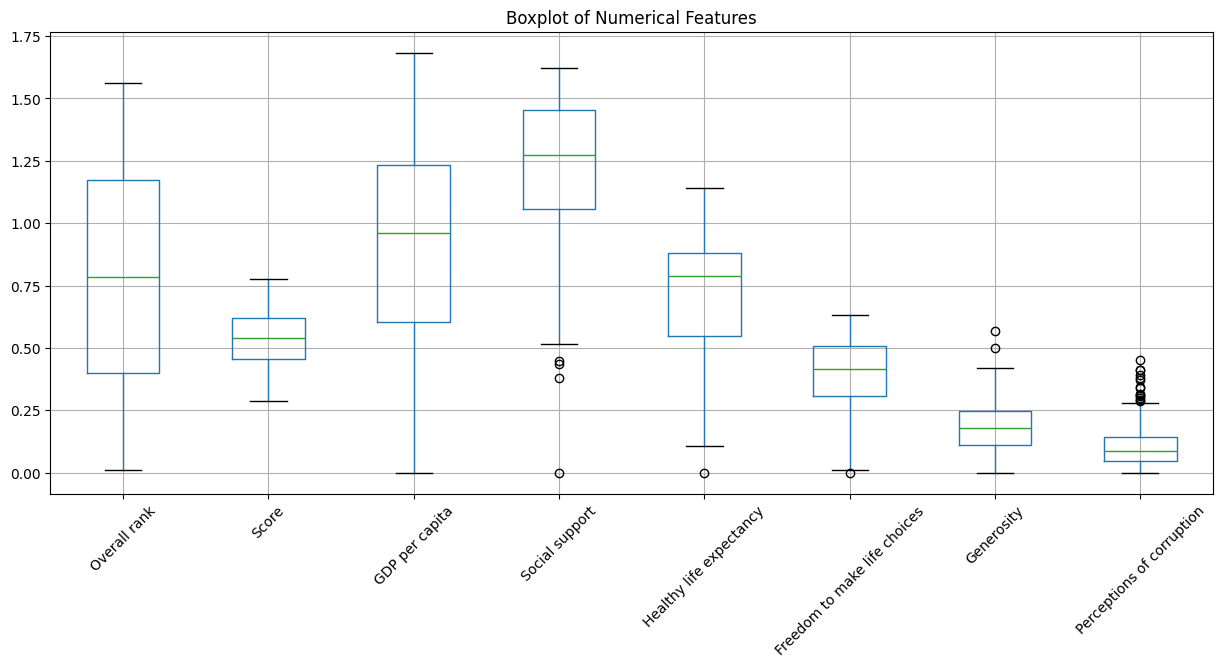

In [ ]:

databoxplot_2019 = data_happy_2019[numeric_cols_2019]
databoxplot_2019['Overall rank'] = databoxplot_2019['Overall rank']/100
databoxplot_2019['Score'] = databoxplot_2019['Score']/10
boxplots_2019 = databoxplot_2019.boxplot(figsize=(15, 6))
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

####**1.9. View features in Scatter plot**

---



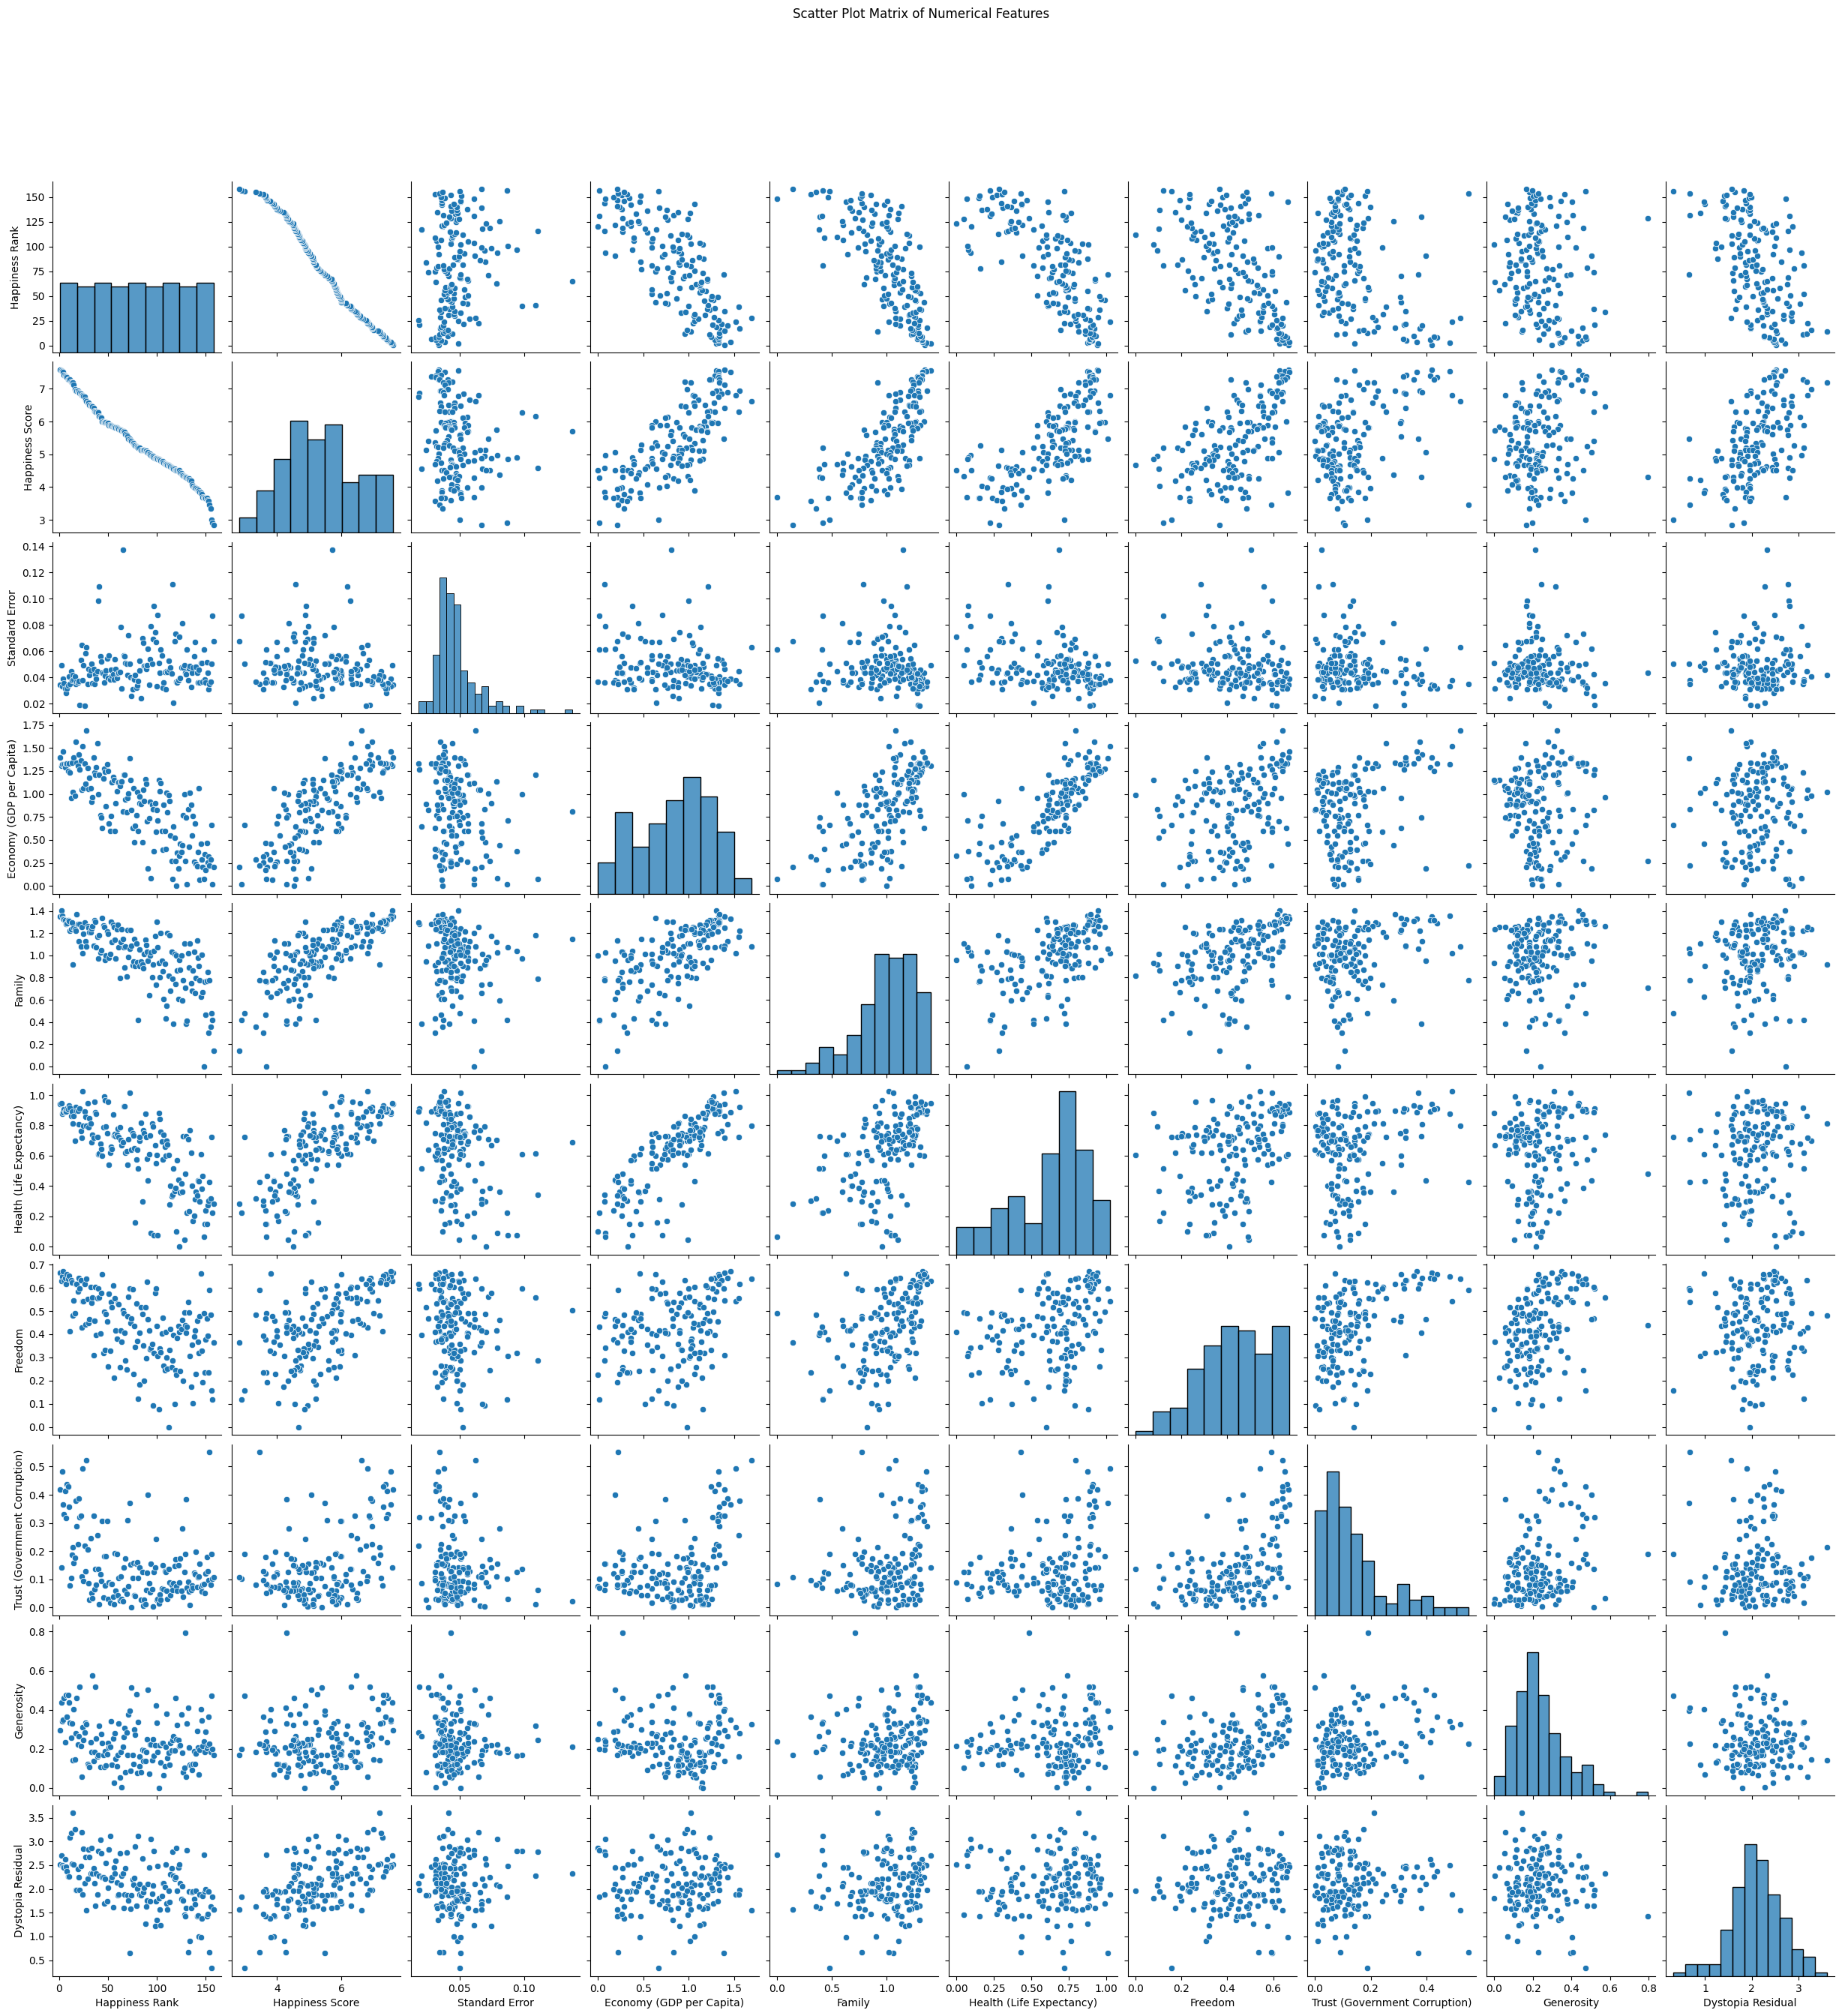

In [ ]:
sns.pairplot(data_happy_2015[numeric_cols_2015])
plt.suptitle("Scatter Plot Matrix of Numerical Features", y=1.08)
plt.show()

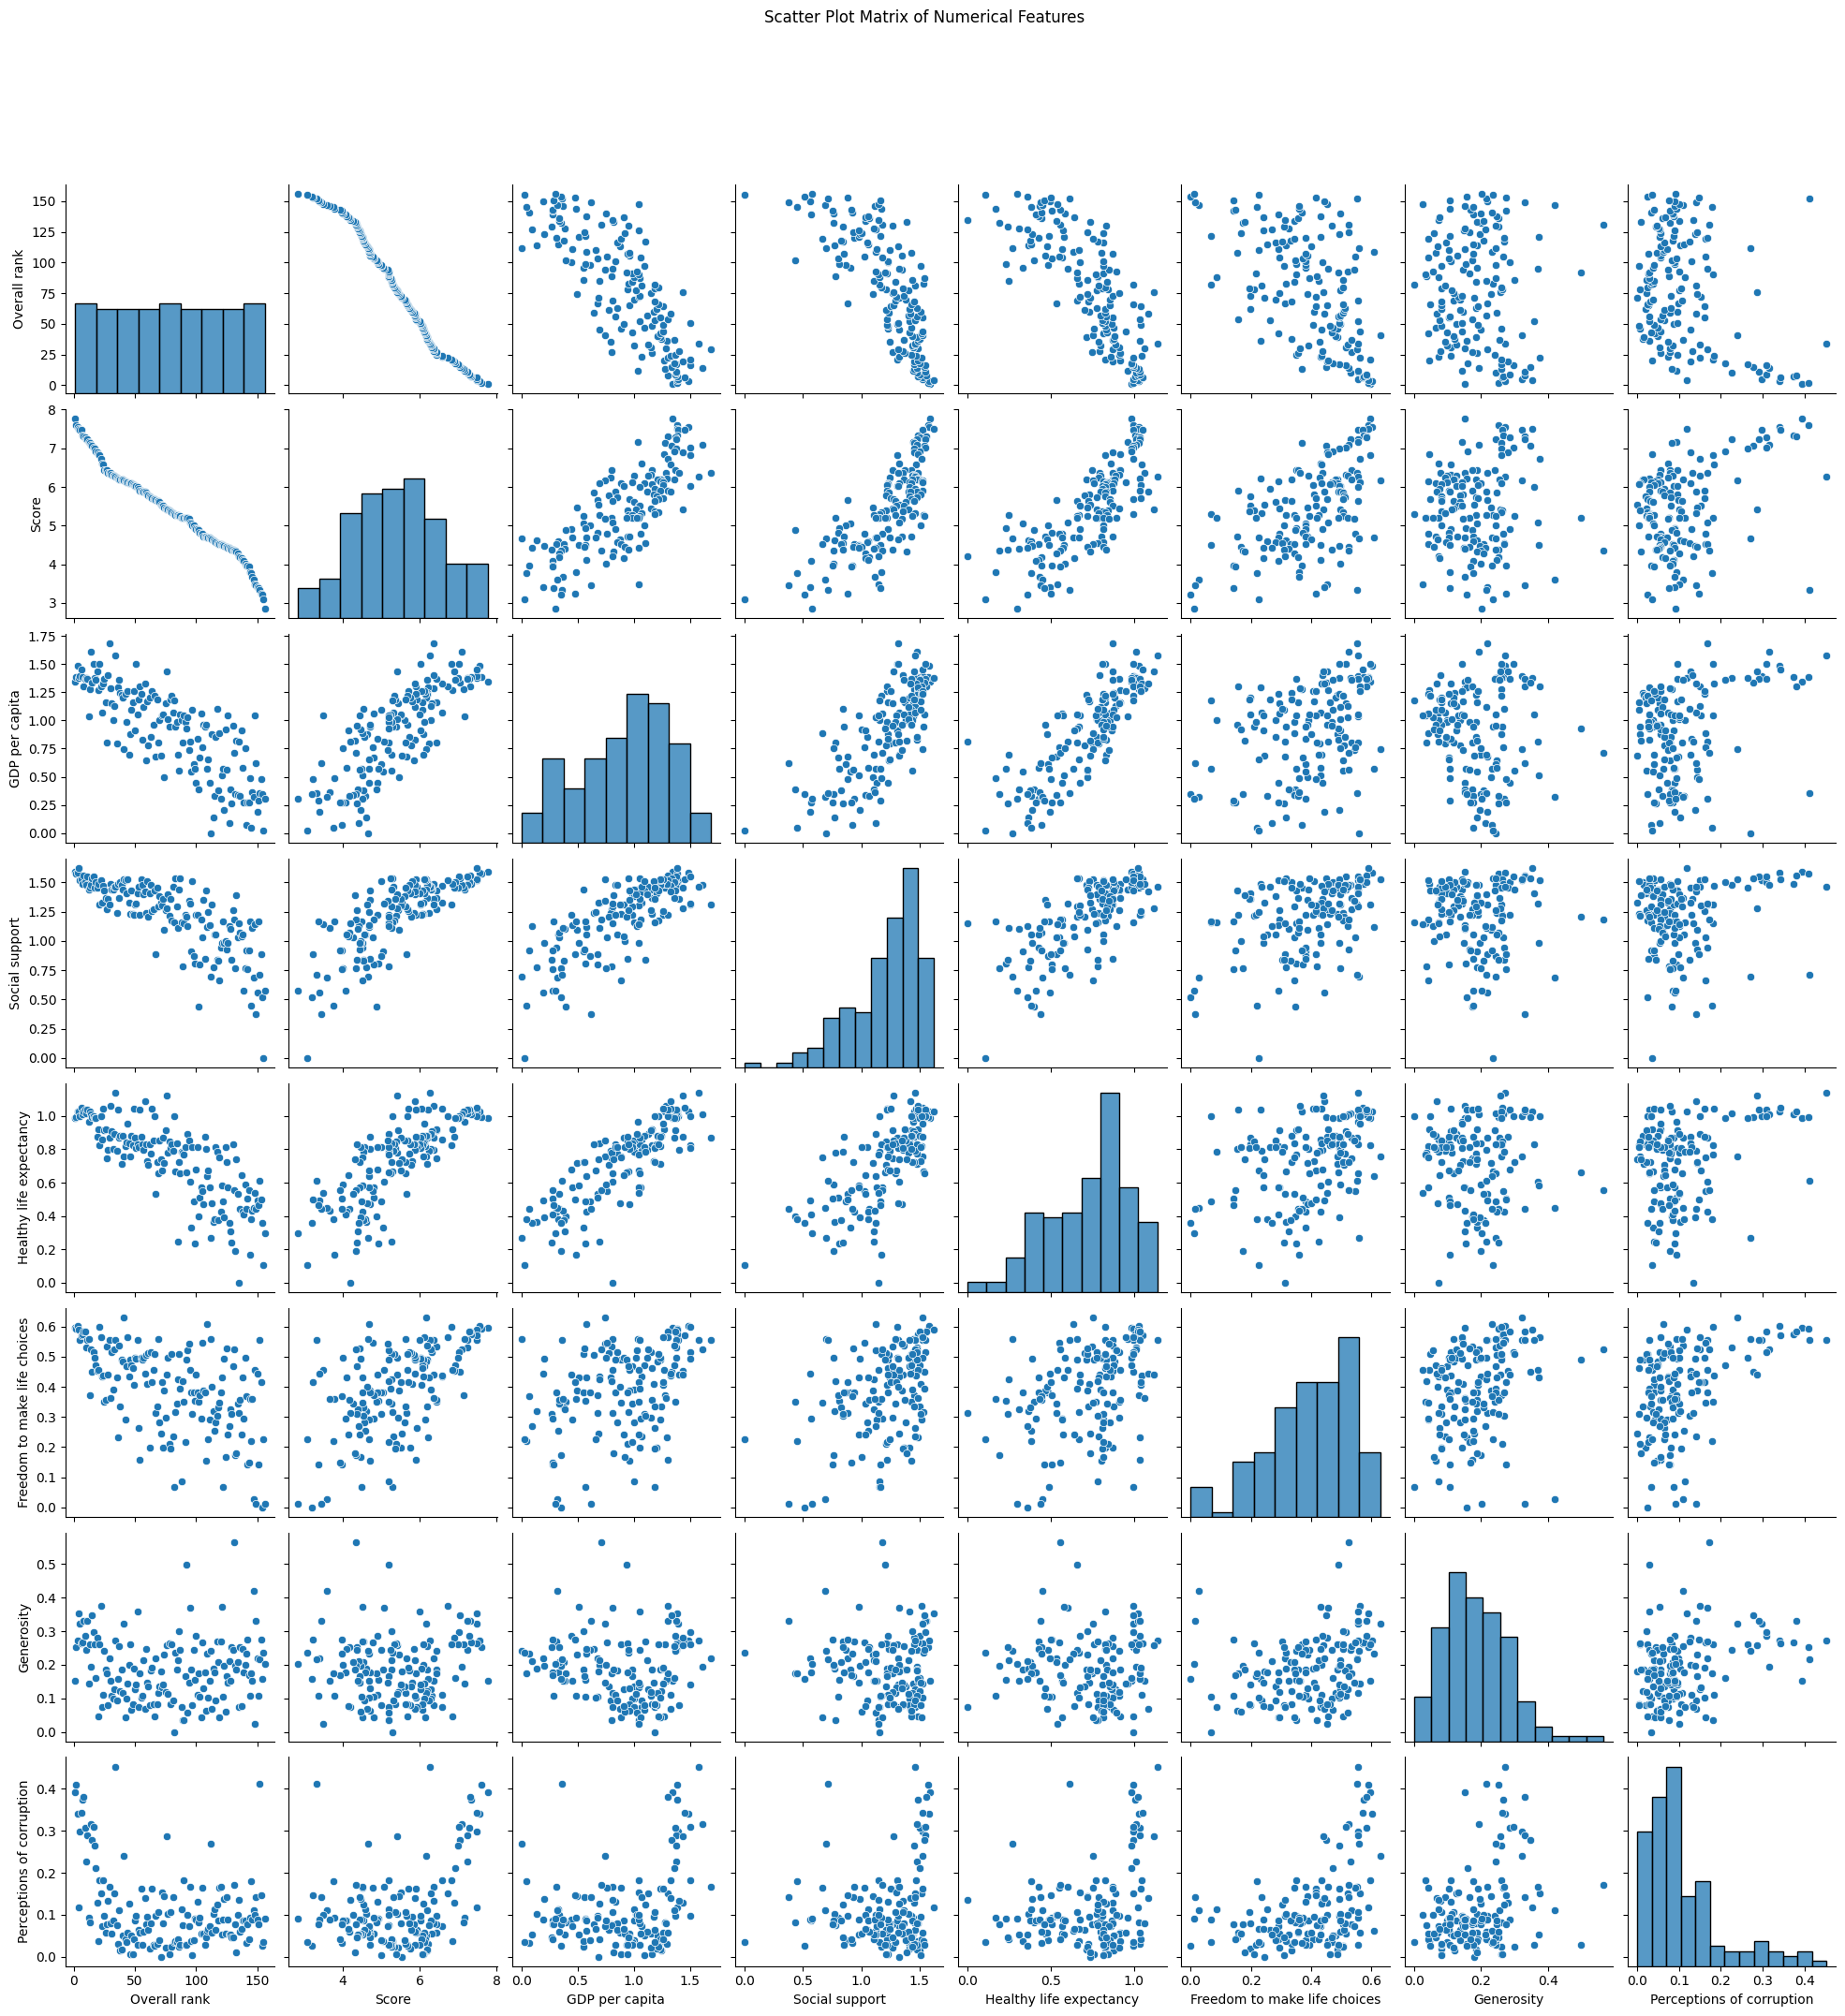

In [ ]:
sns.pairplot(data_happy_2019[numeric_cols_2019])
plt.suptitle("Scatter Plot Matrix of Numerical Features", y=1.08)
plt.show()

###**2. Remove unmatched columns and rename columns**

####**1.1. Rename same data columns which has diffrent column name**

---



In [ ]:
data_happy_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [ ]:
data_happy_2019.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [ ]:

map_2015_common_columns = {
  'Country': 'Country',
  'Happiness Rank': 'Rank',
  'Happiness Score' : 'Score',
  'Economy (GDP per Capita)' : 'GDP per capita',
  'Family':'Social support',
  'Health (Life Expectancy)':'Healthy life expectancy',
  'Freedom':'Freedom to make life choices',
  'Trust (Government Corruption)':'Perceptions of corruption',
  'Generosity':'Generosity'
}

mapped_happy_data_2015 = data_happy_2015.rename(columns=map_2015_common_columns)


In [ ]:
map_2019_common_columns = {
  'Country or region': 'Country',
  'Overall rank': 'Rank',
  'Score' : 'Score',
  'GDP per capita' : 'GDP per capita',
  'Social support':'Social support',
  'Healthy life expectancy':'Healthy life expectancy',
  'Freedom to make life choices':'Freedom to make life choices',
  'Perceptions of corruption':'Perceptions of corruption',
  'Generosity':'Generosity'
}

mapped_happy_data_2019 = data_happy_2019.rename(columns=map_2019_common_columns)

In [ ]:
mapped_happy_data_2015.head(15)

,Country,Region,Rank,Score,Standard Error,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [ ]:
mapped_happy_data_2019.head(15)

,Rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


####**2.2. Get features common features for further analysis**


---

In [ ]:
common_data_features = [
  'Country',
  'Score',
  'GDP per capita',
  'Social support',
  'Healthy life expectancy',
  'Freedom to make life choices',
  'Perceptions of corruption',
  'Generosity'
]

happy_data_2015_common_fr = mapped_happy_data_2015[common_data_features]
happy_data_2019_common_fr = mapped_happy_data_2019[common_data_features]


Since the rank column is derived from happiness score & redundant,it might distort K-Means distance calculations. Because of that, the column is removed.


### **3. Outlier Detection and Removal**

In below code, methods have been implemented to find the first quartile and third quartile. Then to calculate the lower limit of the data set and upper limit data set. Then remove the outlier method to remove outliers. All these methods implement for outlier removal using IQR method.

**3.1. Method  implementation**

---



In [ ]:
def cal_q1_q3(data_f, column):
    Q1 = data_f[column].quantile(0.25)  # first quatile
    Q3 = data_f[column].quantile(0.75)  # third quatile
    return Q1, Q3

def cal_iqr(data_f, column):
    Q1, Q3 = cal_q1_q3(data_f, column)
    IQR = Q3 - Q1  # Interquartile range
    return IQR

def cal_lower_upper(data_f, column):
    Q1, Q3 = cal_q1_q3(data_f, column)
    IQR = cal_iqr(data_f, column)
    lower_bound = Q1 - 1.5 * IQR  # Lower limit
    upper_bound = Q3 + 1.5 * IQR  # Upper limit
    return lower_bound, upper_bound

def removeOutliers(data_f, column):
    lower_bound, upper_bound = cal_lower_upper(data_f, column)
    filtered_data = data_f[(data_f[column] >= lower_bound) & (data_f[column] <= upper_bound)]
    return filtered_data

In [ ]:
def formatTitle(titleData):
  ttl = titleData.split('_')
  if len(ttl) == 2:
    return ttl[0].capitalize() + ' ' + ttl[1].capitalize()

  elif len(ttl) == 3:
    return ttl[0].capitalize() + ' ' + ttl[1].capitalize() + ' ' + ttl[2].capitalize()

  elif len(ttl) == 1:
    return ttl[0].capitalize()

#####**2. Visualize outliers - numerical data**

---

---------------------------------------------------------------------------------------------------


Feature - Score



Data shape before outlier removal: (158, 7)




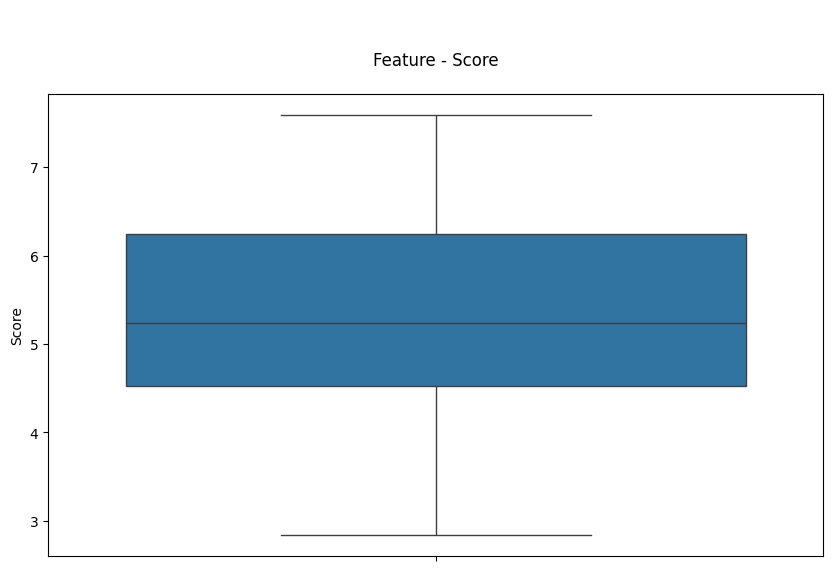




---------------------------------------------------------------------------------------------------


Feature - Gdp per capita



Data shape before outlier removal: (158, 7)




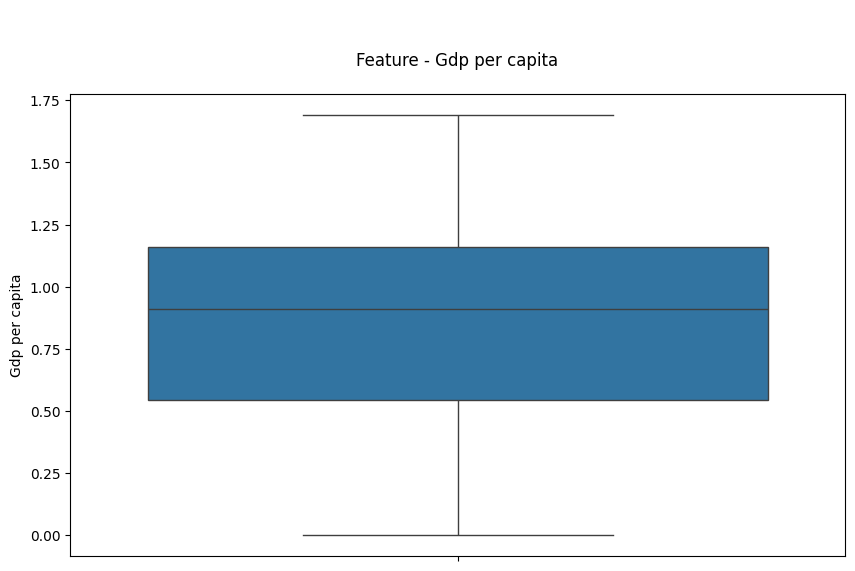




---------------------------------------------------------------------------------------------------


Feature - Social support



Data shape before outlier removal: (158, 7)




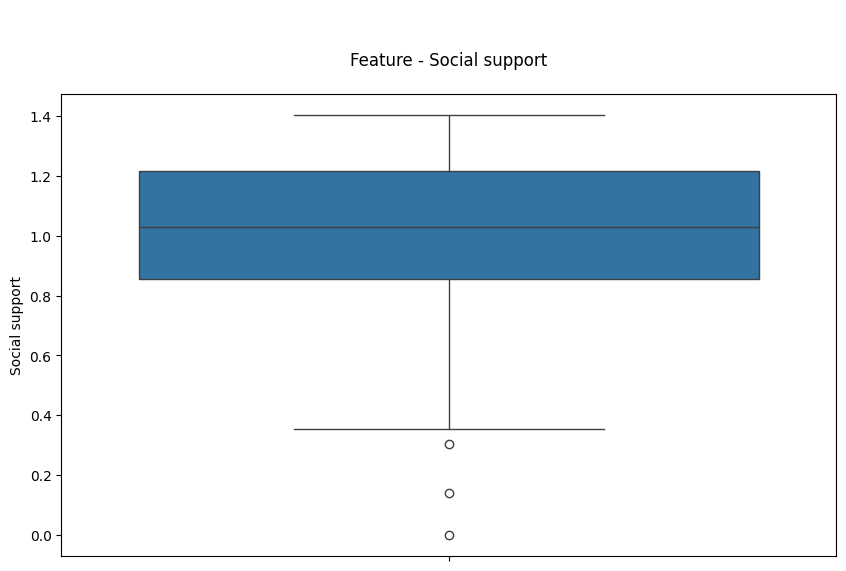




---------------------------------------------------------------------------------------------------


Feature - Healthy life expectancy



Data shape before outlier removal: (158, 7)




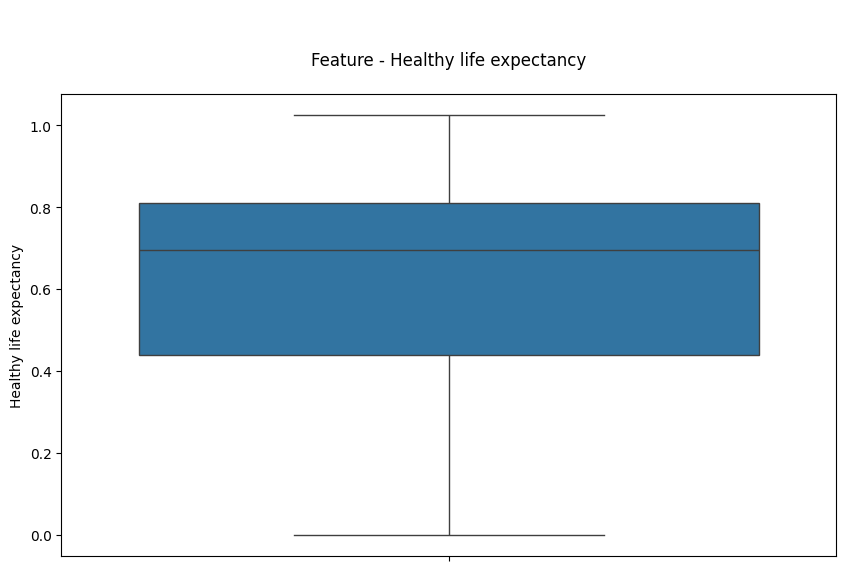




---------------------------------------------------------------------------------------------------


Feature - Freedom to make life choices



Data shape before outlier removal: (158, 7)




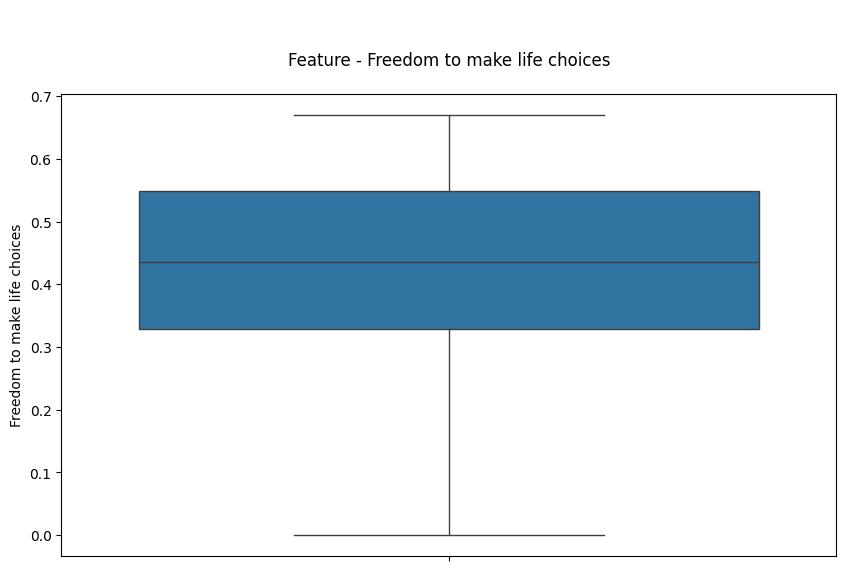




---------------------------------------------------------------------------------------------------


Feature - Perceptions of corruption



Data shape before outlier removal: (158, 7)




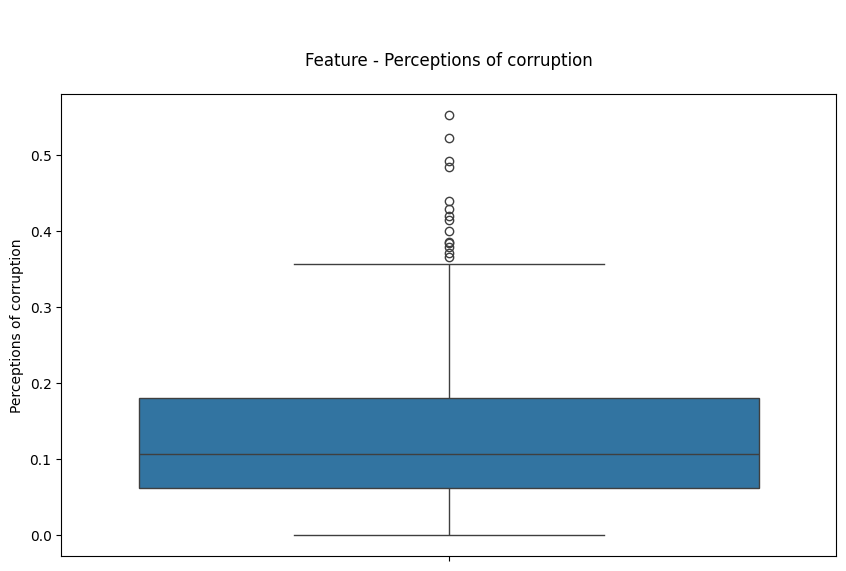




---------------------------------------------------------------------------------------------------


Feature - Generosity



Data shape before outlier removal: (158, 7)




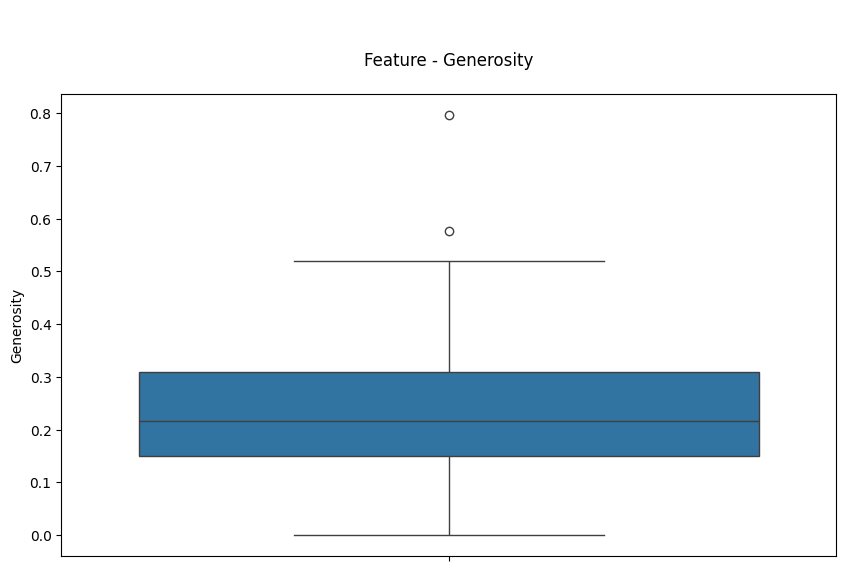

In [ ]:
numeric_cols_2015_renamed = happy_data_2015_common_fr.select_dtypes(include=[np.number]).columns

for col in numeric_cols_2015_renamed:
    print("---------------------------------------------------------------------------------------------------")
    print(f"\n\nFeature - {formatTitle(col)}\n")
    print(f"\n\nData shape before outlier removal: {happy_data_2015_common_fr[numeric_cols_2015_renamed].shape}\n\n")
    plt.figure(figsize=(10, 6))
    plt.title(f"\n\nFeature - {formatTitle(col)}\n")
    sns.boxplot(y=happy_data_2015_common_fr[numeric_cols_2015_renamed][col])
    plt.xlabel('')
    plt.ylabel(formatTitle(col))
    plt.show()
    print("\n\n")



---------------------------------------------------------------------------------------------------


Feature - Score



Data shape before outlier removal: (156, 7)




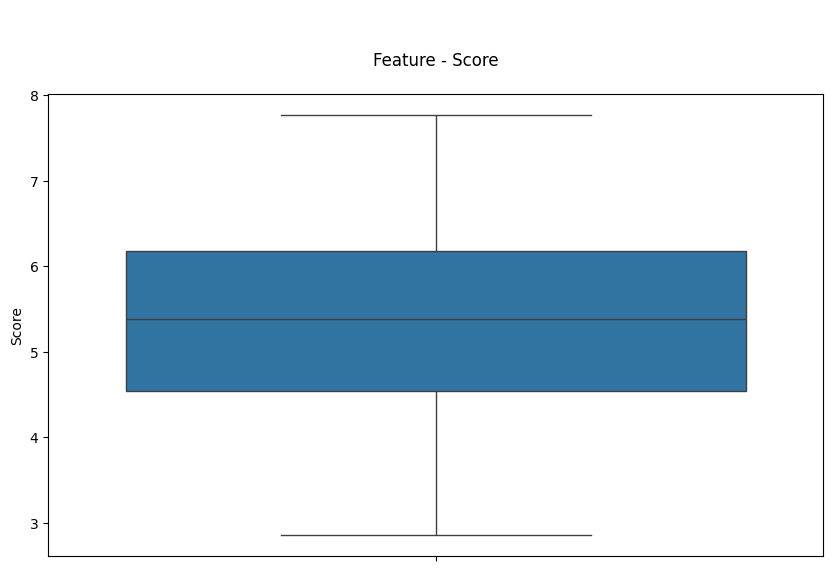




---------------------------------------------------------------------------------------------------


Feature - Gdp per capita



Data shape before outlier removal: (156, 7)




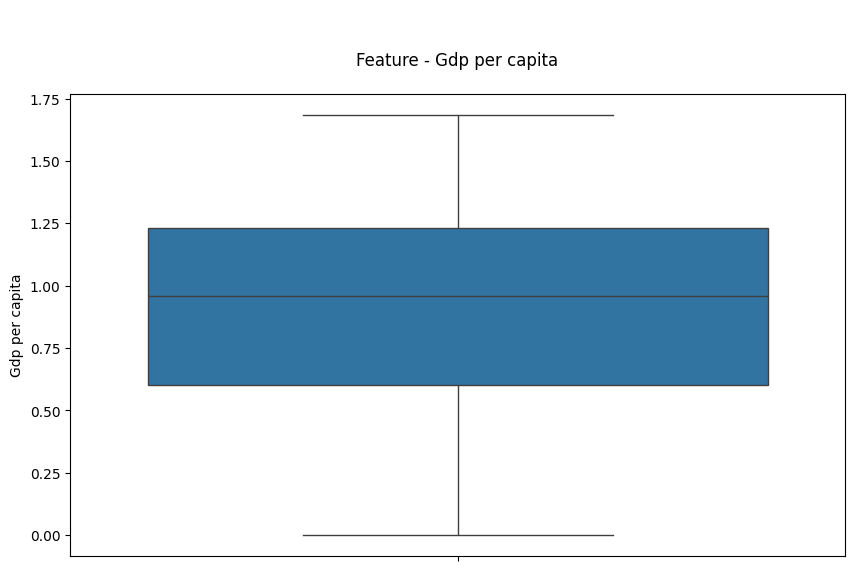




---------------------------------------------------------------------------------------------------


Feature - Social support



Data shape before outlier removal: (156, 7)




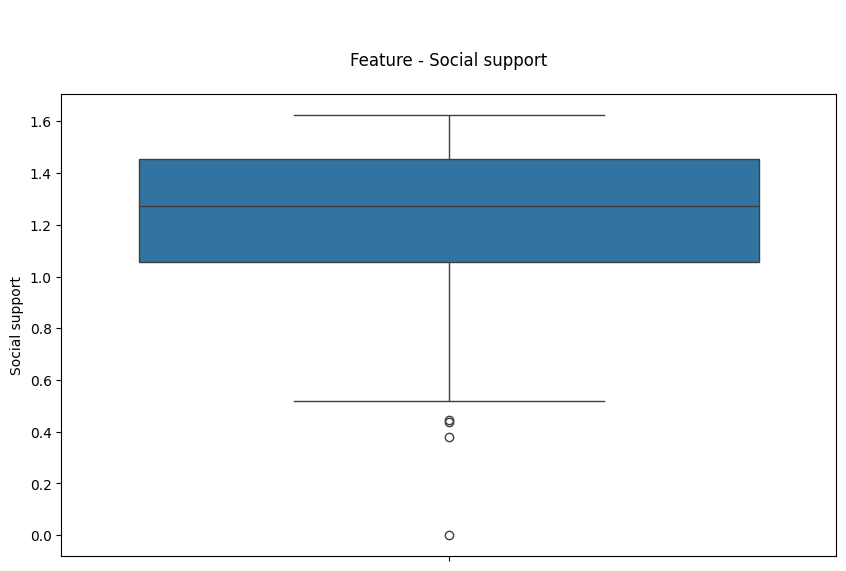




---------------------------------------------------------------------------------------------------


Feature - Healthy life expectancy



Data shape before outlier removal: (156, 7)




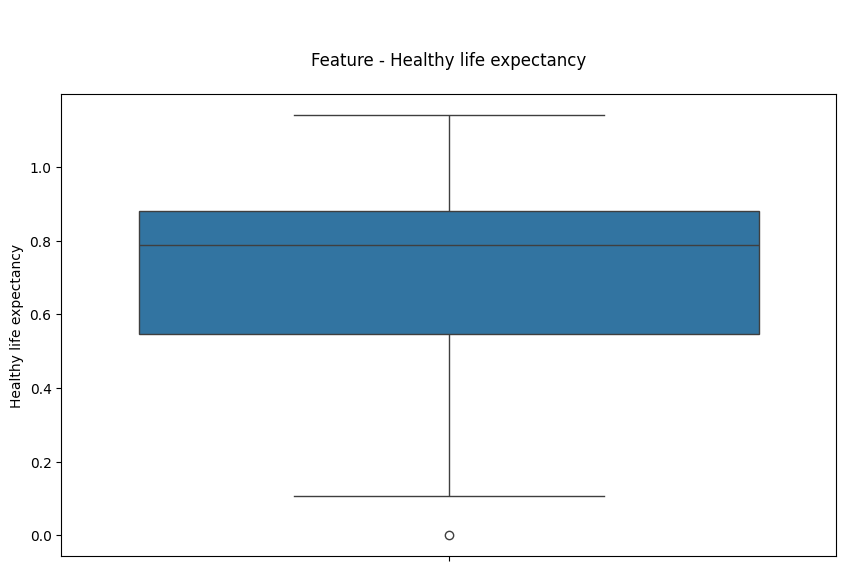




---------------------------------------------------------------------------------------------------


Feature - Freedom to make life choices



Data shape before outlier removal: (156, 7)




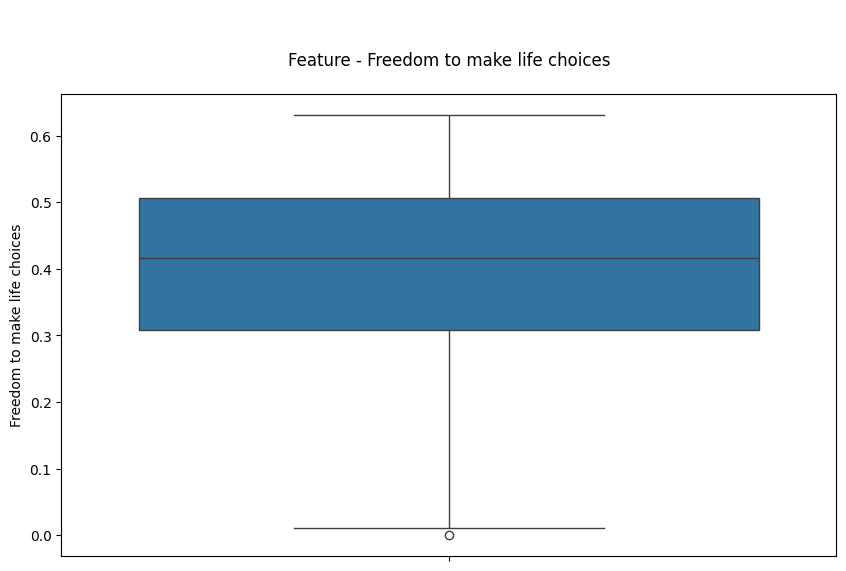




---------------------------------------------------------------------------------------------------


Feature - Perceptions of corruption



Data shape before outlier removal: (156, 7)




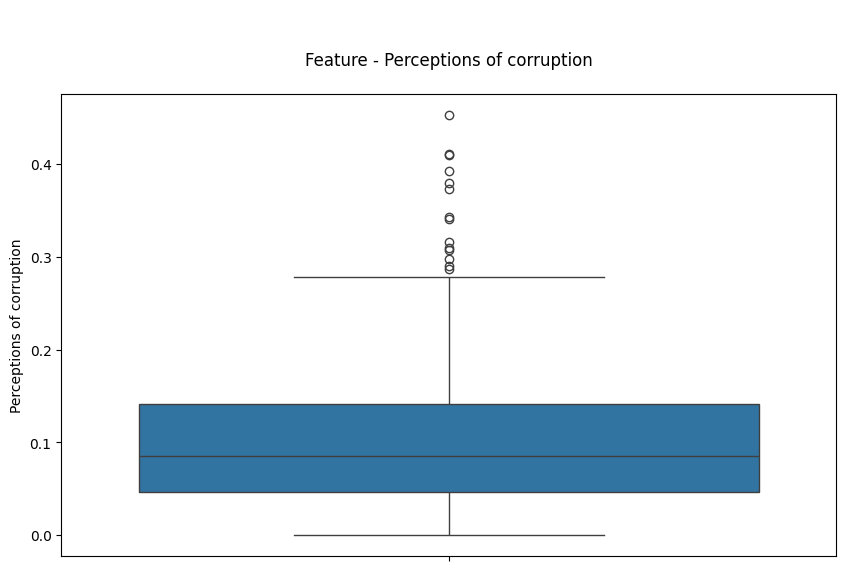




---------------------------------------------------------------------------------------------------


Feature - Generosity



Data shape before outlier removal: (156, 7)




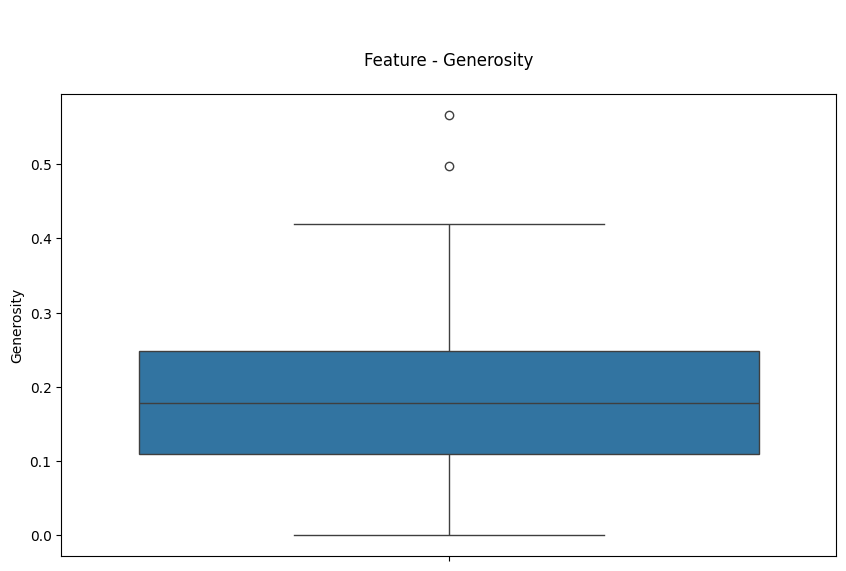

In [ ]:
numeric_cols_2019_renamed = happy_data_2019_common_fr.select_dtypes(include=[np.number]).columns
for col in numeric_cols_2019_renamed:
    print("---------------------------------------------------------------------------------------------------")
    print(f"\n\nFeature - {formatTitle(col)}\n")
    print(f"\n\nData shape before outlier removal: {happy_data_2019_common_fr[numeric_cols_2019_renamed].shape}\n\n")
    plt.figure(figsize=(10, 6))
    plt.title(f"\n\nFeature - {formatTitle(col)}\n")
    sns.boxplot(y=happy_data_2019_common_fr[numeric_cols_2019_renamed][col])
    plt.xlabel('')
    plt.ylabel(formatTitle(col))
    plt.show()
    print("\n\n")



####**3. Find outliers using lower limit and upper limit & remove them using above implemented methods**


---





Data shape after outlier removal: (158, 7)




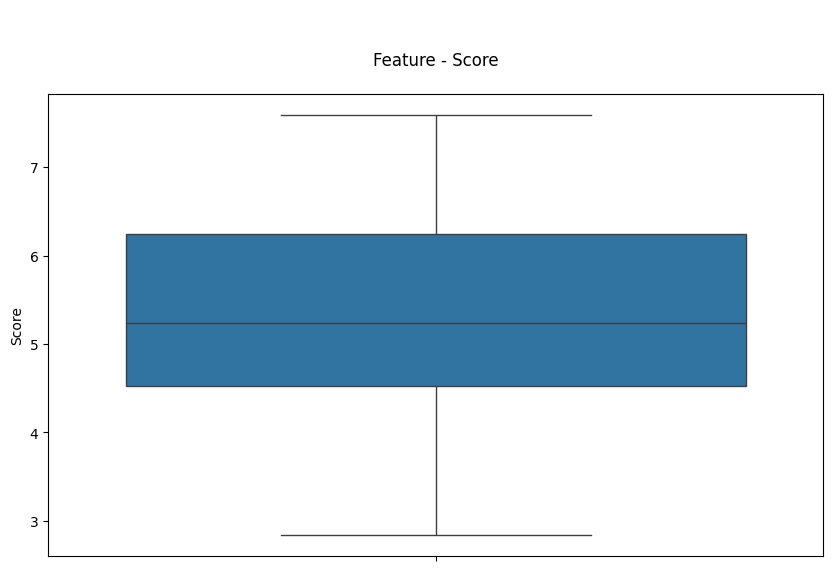






Data shape after outlier removal: (158, 7)




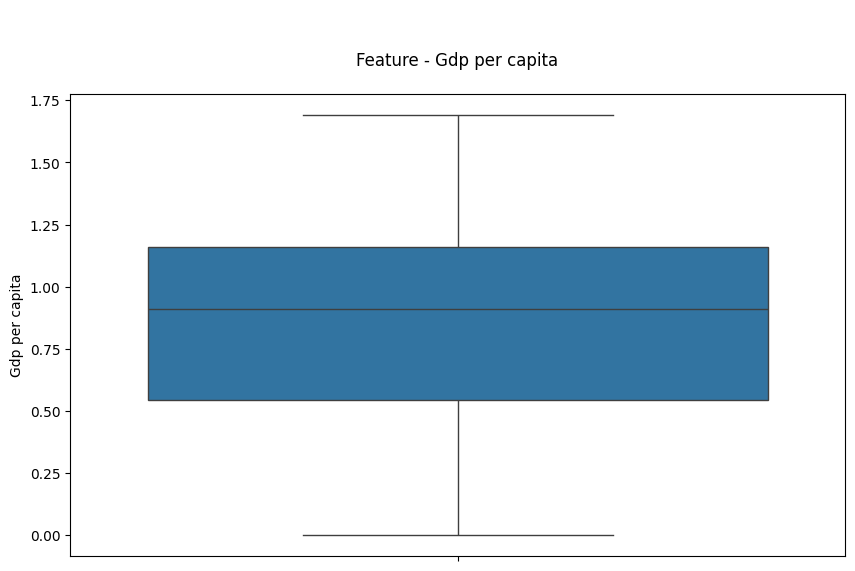






Data shape after outlier removal: (155, 7)




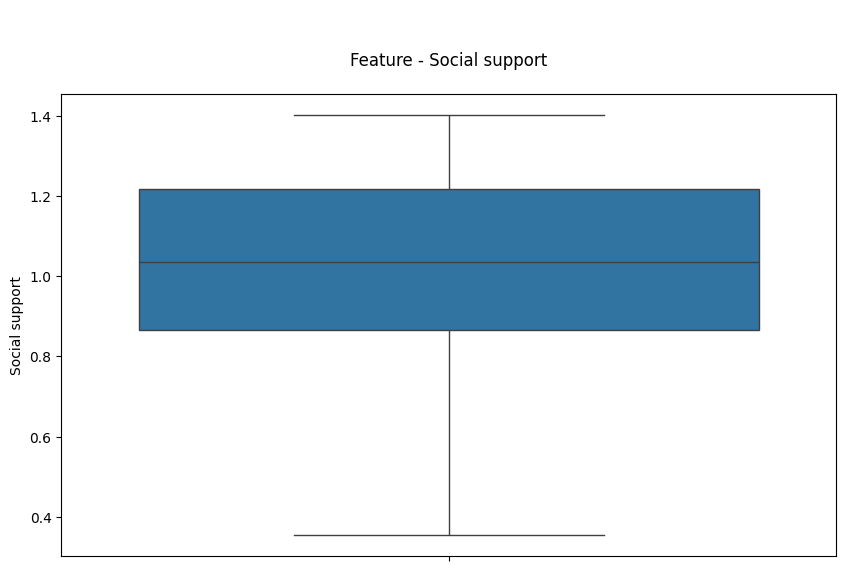






Data shape after outlier removal: (158, 7)




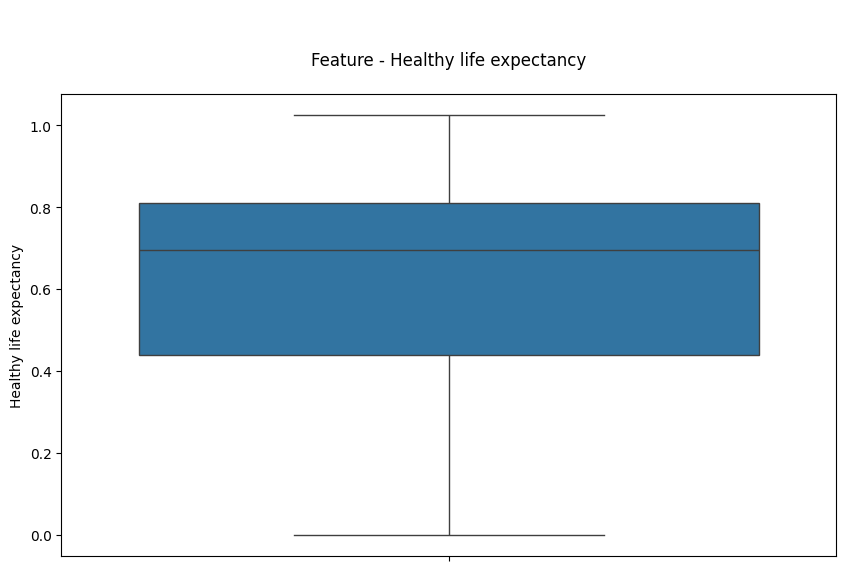






Data shape after outlier removal: (158, 7)




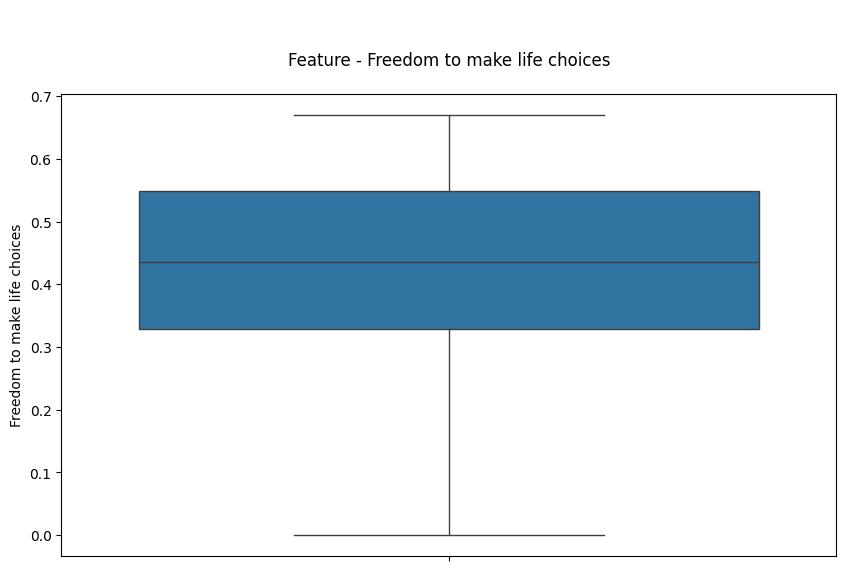






Data shape after outlier removal: (144, 7)




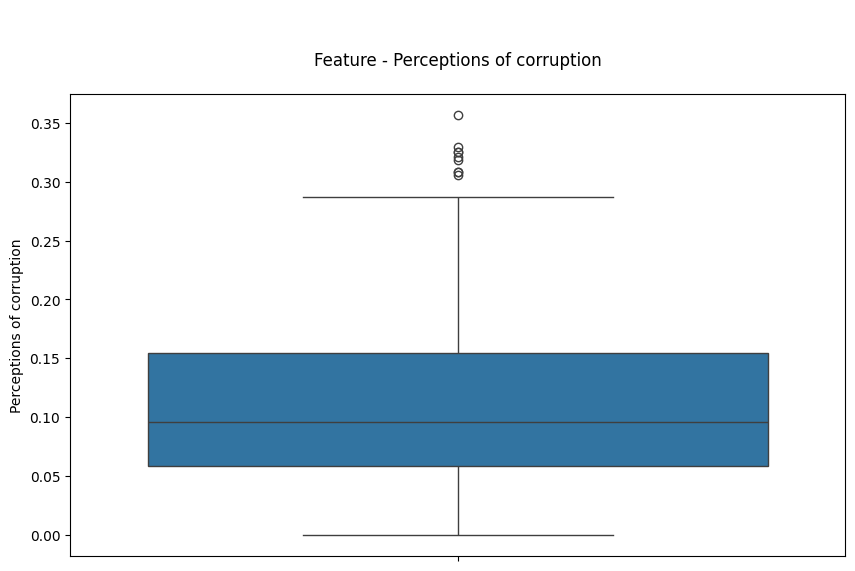






Data shape after outlier removal: (156, 7)




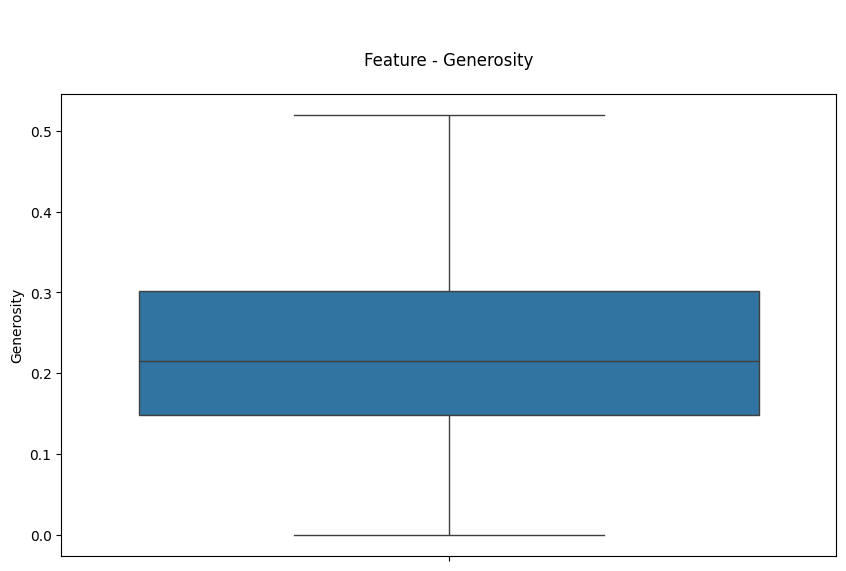

In [ ]:
for col in numeric_cols_2015_renamed:
  outlier_removed_2015 = removeOutliers(happy_data_2015_common_fr, col)
  print(f"\n\nData shape after outlier removal: {outlier_removed_2015[numeric_cols_2015_renamed].shape}\n\n")
  plt.figure(figsize=(10, 6))
  plt.title(f"\n\nFeature - {formatTitle(col)}\n")
  sns.boxplot(y=outlier_removed_2015[numeric_cols_2015_renamed][col])
  plt.ylabel(formatTitle(col))
  plt.show()
  print("\n\n")



Data shape after outlier removal: (156, 7)




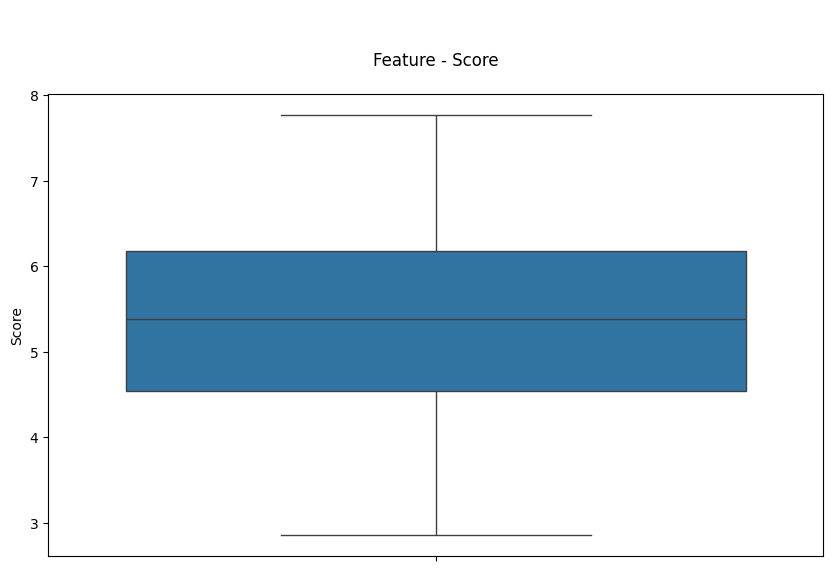






Data shape after outlier removal: (156, 7)




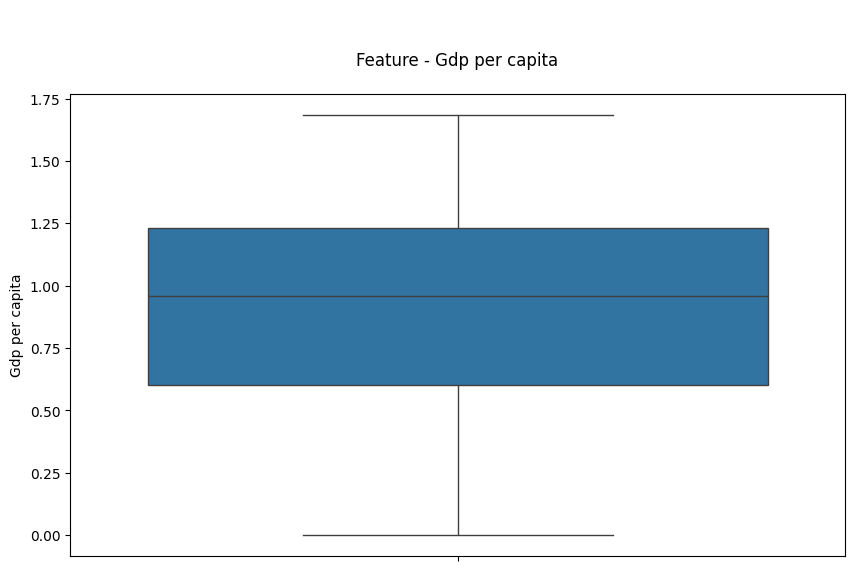






Data shape after outlier removal: (152, 7)




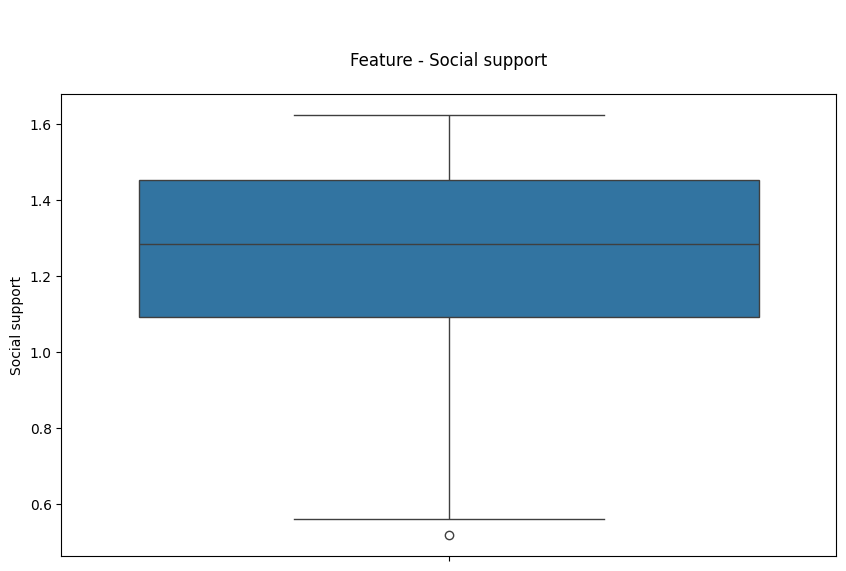






Data shape after outlier removal: (155, 7)




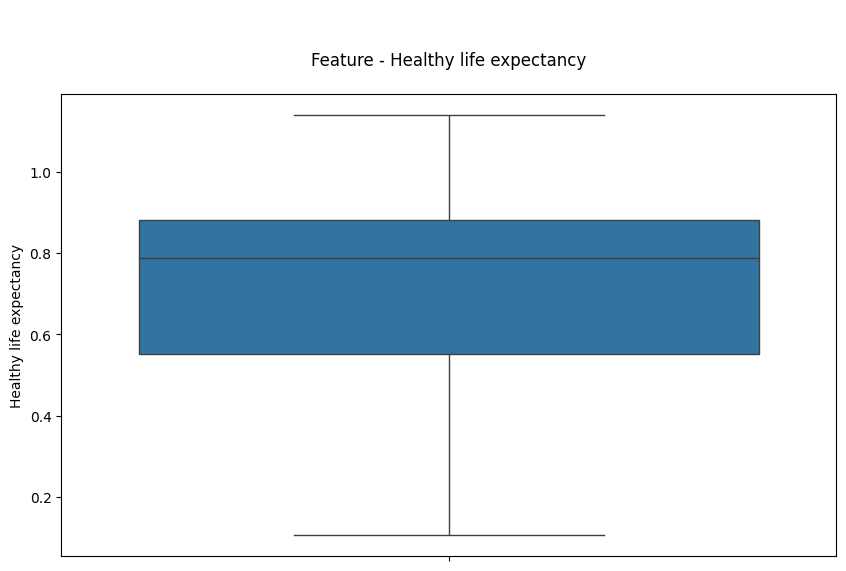






Data shape after outlier removal: (155, 7)




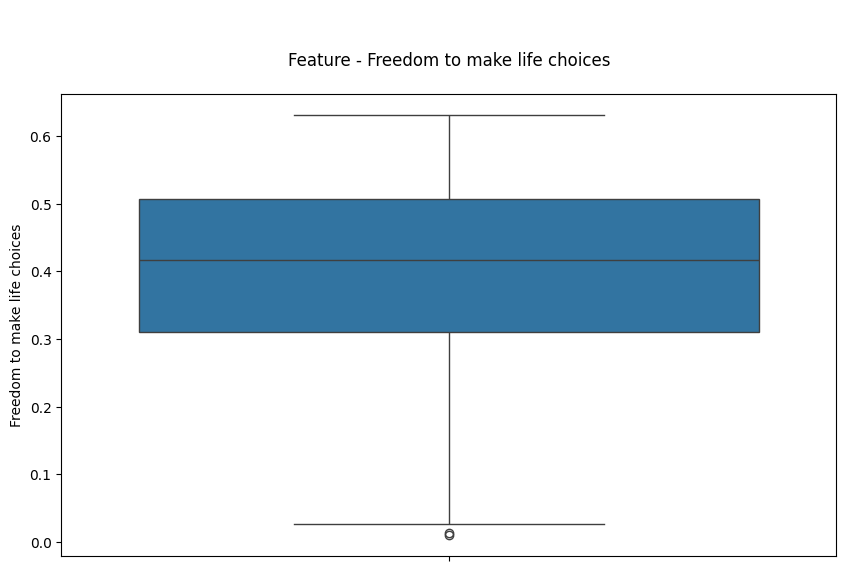






Data shape after outlier removal: (142, 7)




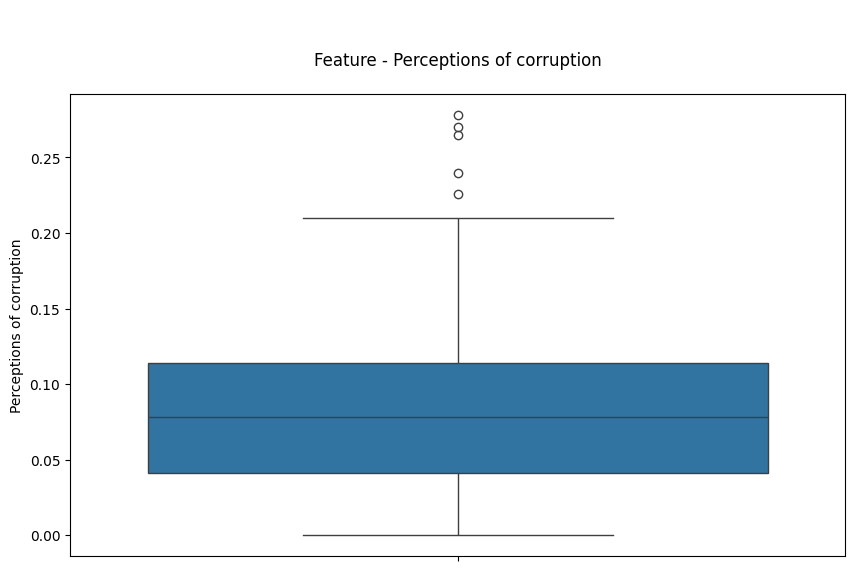






Data shape after outlier removal: (154, 7)




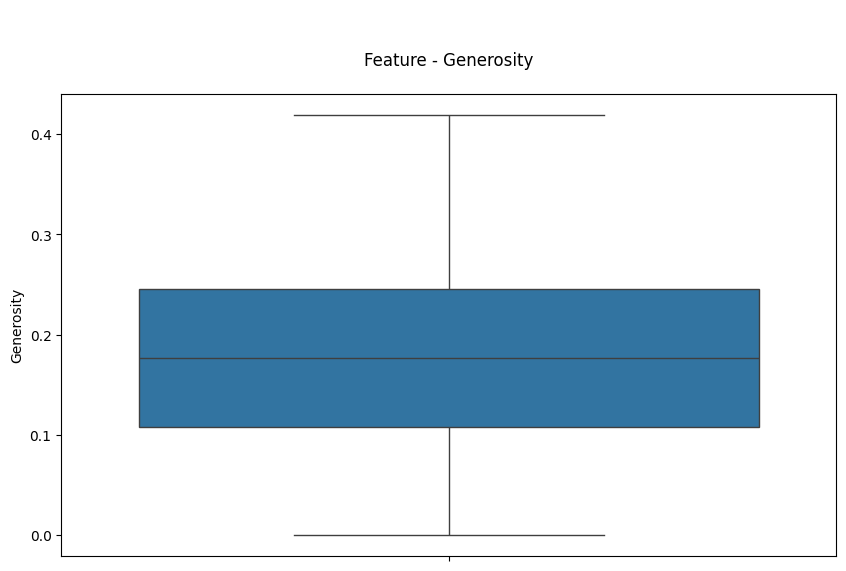

In [ ]:
for col in numeric_cols_2019_renamed:
  outlier_removed_2019 = removeOutliers(happy_data_2019_common_fr, col)
  print(f"\n\nData shape after outlier removal: {outlier_removed_2019[numeric_cols_2019_renamed].shape}\n\n")
  plt.figure(figsize=(10, 6))
  plt.title(f"\n\nFeature - {formatTitle(col)}\n")
  sns.boxplot(y=outlier_removed_2019[numeric_cols_2019_renamed][col])
  plt.ylabel(formatTitle(col))
  plt.show()
  print("\n\n")

### **3. Feature Scaling and Transformation**

In [ ]:
scaler = RobustScaler()
scaled_2015 = scaler.fit_transform(outlier_removed_2015[numeric_cols_2015_renamed])
#df_2015_scaled = pd.DataFrame(scaled_2015, columns=outlier_removed_2015[numeric_cols_2015_renamed].columns, index=outlier_removed_2015[numeric_cols_2015_renamed].index)


In [ ]:
scaled_2019 = scaler.fit_transform(outlier_removed_2019[numeric_cols_2019_renamed])
#df_2019_scaled = pd.DataFrame(scaled_2019, columns=outlier_removed_2019[numeric_cols_2019_renamed].columns, index=outlier_removed_2019[numeric_cols_2019_renamed].index)

### **4. Clustering Model Development**

####**4.1. Finding optimal K value using Elbow method**




---



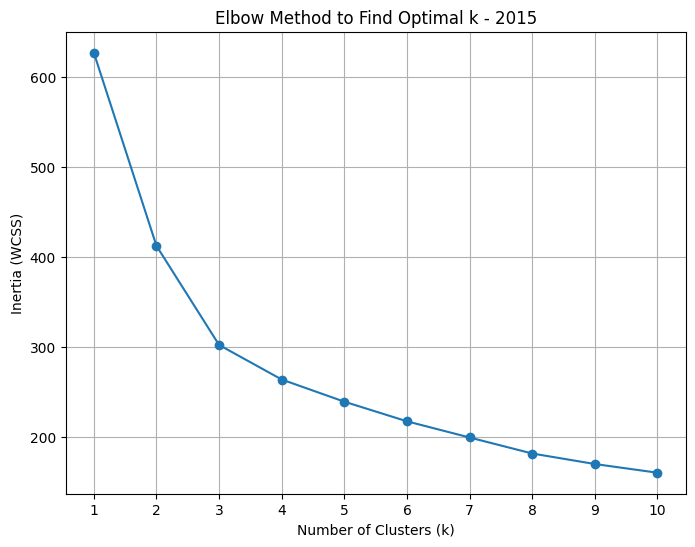

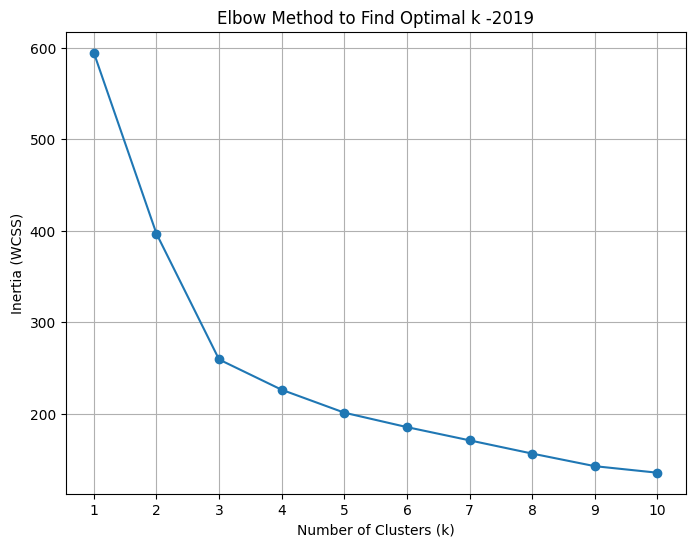

In [ ]:
k_values_2015_2019 = range(1, 11)

inertias_2015 = []
inertias_2019 = []

for k in k_values_2015_2019:
    kmeans_2015 = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_2019 = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_2015.fit(scaled_2015)
    kmeans_2019.fit(scaled_2019)
    inertias_2015.append(kmeans_2015.inertia_)
    inertias_2019.append(kmeans_2019.inertia_)


plt.figure(figsize=(8, 6))
plt.plot(k_values_2015_2019, inertias_2015, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method to Find Optimal k - 2015')
plt.xticks(k_values_2015_2019)
plt.grid(True)
plt.show()

print("\n\n")

plt.figure(figsize=(8, 6))
plt.plot(k_values_2015_2019, inertias_2019, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method to Find Optimal k -2019')
plt.xticks(k_values_2015_2019)
plt.grid(True)
plt.show()


We can use the **Silhouette Score** of each model which measures how well each point lies within its cluster versus the nearest other cluster & **Calinski-Harabasz Index** measures the ratio of between cluster dispersion to within cluster dispersion for prove that three is the best value for K. In next step these values will be checked for K = 3 and K =2 since 2015, the K value is not clear to extract.

####**4.2. Finding optimal K from values got by elbow method**


---




In [ ]:
k_values = [ 2, 3]
sil_scores_2015 = []
cl_scores_2015 = []
sil_scores_2019 = []
cl_scores_2019 = []

for k_val in k_values:

  print("\n--------------------------------------------------------------------------")
  print("\nK value:", k_val)

  kmean_check = KMeans(n_clusters=k_val, random_state=42,n_init=50)

  clusters_check_2015 = kmean_check.fit_predict(scaled_2015)
  clusters_check_2019 = kmean_check.fit_predict(scaled_2019)

  sil_2015_check = silhouette_score(scaled_2015, clusters_check_2015)
  sil_2019_check = silhouette_score(scaled_2019, clusters_check_2019)

  ch_2015 = calinski_harabasz_score(scaled_2015, clusters_check_2015)
  ch_2019 = calinski_harabasz_score(scaled_2019, clusters_check_2019)

  print("\n\nSilhouette Score -2015 :",sil_2015_check)
  print("\nSilhouette Score -2019 :",sil_2019_check)

  print("\n\nCalinski-Harabasz Index -2015:",ch_2015)
  print("\nCalinski-Harabasz Index -2019:",ch_2019)
  sil_scores_2015.append(sil_2015_check)
  cl_scores_2015.append(ch_2015)
  sil_scores_2019.append(sil_2019_check)
  cl_scores_2019.append(ch_2019)



--------------------------------------------------------------------------

K value: 2


Silhouette Score -2015 : 0.32820168783052256

Silhouette Score -2019 : 0.29461749635132317


Calinski-Harabasz Index -2015: 80.05608619779065

Calinski-Harabasz Index -2019: 75.71339754605695

--------------------------------------------------------------------------

K value: 3


Silhouette Score -2015 : 0.28822873089542195

Silhouette Score -2019 : 0.3494521694455686


Calinski-Harabasz Index -2015: 82.09100872629081

Calinski-Harabasz Index -2019: 97.53643742678368


#####**4.2.1. Silhouette score comparison of  K = 2 and K = 3 for each year (2015, 2019)**




---





Silhouette Score in Year 2015 & 2019 - Table view


,2015,2019
K2,0.328202,0.294617
K3,0.288229,0.349452




Silhouette Score in Year 2015 & 2019 - Bar graph view


<Axes: >

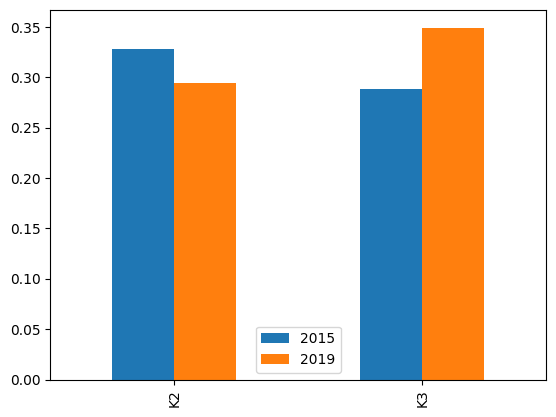

In [ ]:


print("\n\nSilhouette Score in Year 2015 & 2019 - Table view")
display(pd.DataFrame({'2015' :sil_scores_2015,'2019':sil_scores_2019}, index =['K2', 'K3']))

print("\n\nSilhouette Score in Year 2015 & 2019 - Bar graph view")
display(pd.DataFrame({'2015' :sil_scores_2015,'2019':sil_scores_2019}, index =['K2', 'K3']).plot(kind='bar'))


#####**4.2.3. Calinski-Harabasz Index comparison of  K = 2 and K = 3 for each year (2015, 2019)**




---




Calinski-Harabasz Index in Year 2015 & 2019 - Table view


,2015,2019
K2,80.056086,75.713398
K3,82.091009,97.536437




Calinski-Harabasz Index in Year 2015 & 2019 - Bar graph view


<Axes: >

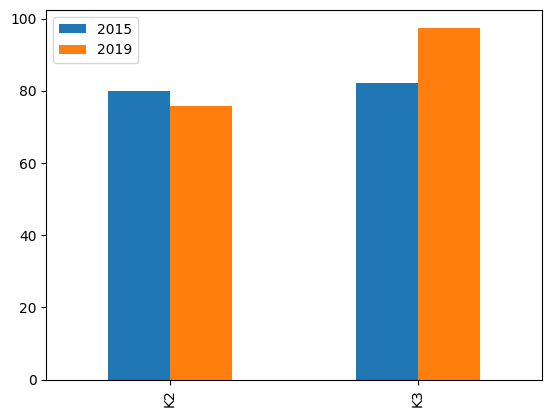

In [ ]:

print("\n\nCalinski-Harabasz Index in Year 2015 & 2019 - Table view")
display(pd.DataFrame({'2015' :cl_scores_2015,'2019':cl_scores_2019}, index =['K2', 'K3']))

print("\n\nCalinski-Harabasz Index in Year 2015 & 2019 - Bar graph view")
display(pd.DataFrame({'2015' :cl_scores_2015,'2019':cl_scores_2019}, index =['K2', 'K3']).plot(kind='bar'))



The above comparison shows that K = 3 provides a higher Calinski-Harabasz Index for each year. However, the silhouette Score was slightly higher for K = 2 in 2015. In 2019, the highest Silhouette Score was identified for K = 3. Even though the Silhouette Score was somewhat lower in 2015 since its Calinski-Harabasz Index was higher, value three is selected as the K value for both 2015 and 2019.

####**4.3. K-means clustering**

---



Finally used k means clustering for scaled data and the identified clusters added to outliers removed dataset as a separate column named "Cluster".


In [ ]:
k = 3

kmeans_2015 = KMeans(n_clusters=k, random_state=42,n_init=50)
clusters_2015 = kmeans_2015.fit_predict(scaled_2015)
outlier_removed_2015["Cluster"] = clusters_2015


kmeans_2019 = KMeans(n_clusters=k, random_state=42,n_init=50)
clusters_2019 = kmeans_2019.fit_predict(scaled_2019)
outlier_removed_2019["Cluster"] = clusters_2019


<ipython-input-38-6a5608cbc0d3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_removed_2015["Cluster"] = clusters_2015
<ipython-input-38-6a5608cbc0d3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_removed_2019["Cluster"] = clusters_2019


### **5. Cluster Evaluation**

2015 - Calinski-Harabasz: 0.28822873089542195
2015 - Calinski-Harabasz Score: 82.09100872629081
2019 - Silhouette Score: 0.3494521694455686
2019 - Calinski-Harabasz Score: 97.53643742678368


Calinski-Harabasz Index & Silhouette Score in Year 2015 & 2019 - Table view


,Calinski-Harabasz,Silhouette Score
2015,28.822873,82.091009
2019,34.945217,97.536437




Calinski-Harabasz Index &  Silhouette Score in Year 2015 & 2019 - Bar graph view


<Axes: >

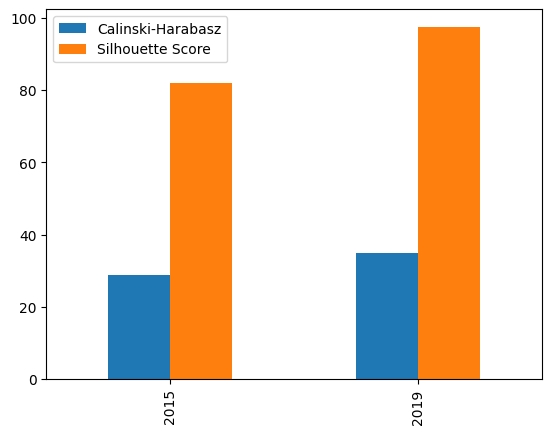

In [ ]:
sil_2015 = silhouette_score(scaled_2015, clusters_2015)
ch_2015 = calinski_harabasz_score(scaled_2015, clusters_2015)
print("2015 - Calinski-Harabasz:", sil_2015)
print("2015 - Calinski-Harabasz Score:", ch_2015)

sil_2019 = silhouette_score(scaled_2019, clusters_2019)
ch_2019 = calinski_harabasz_score(scaled_2019, clusters_2019)
print("2019 - Silhouette Score:", sil_2019)
print("2019 - Calinski-Harabasz Score:", ch_2019)


print("\n\nCalinski-Harabasz Index & Silhouette Score in Year 2015 & 2019 - Table view")
display(pd.DataFrame({'Calinski-Harabasz' :[sil_2015 * 100 ,sil_2019 * 100],'Silhouette Score':[ch_2015,ch_2019]}, index =['2015', '2019']))

print("\n\nCalinski-Harabasz Index &  Silhouette Score in Year 2015 & 2019 - Bar graph view")
display(pd.DataFrame({'Calinski-Harabasz' :[sil_2015 * 100 ,sil_2019 * 100],'Silhouette Score':[ch_2015,ch_2019]}, index =['2015', '2019']).plot(kind='bar'))



Silhouette Score is (0.288) in 2015 indicates reasonable but overlapping clusters & it is 0.349 in 2019 shows improved clarity which means data points belong more cleanly to their clusters.
Calinski Harabasz Index of  82.01 in 2015 suggests moderate between/within variances. It is 97.57 in 2019 reflects a stronger variance ratio which means clusters are tighter and farther apart.
Together, these metrics confirm that the 2019 clustering captures a more distinct and compact grouping of countries, likely reflecting shifts in socio-economic patterns between 2015 and 2019.
To idenfity these shift in next step model drifting analysis will be used.


### **5.Model Drift Analysis**

**1.  Measure centroid shifts and cluster membership changes over time**


---



**a. Centroid shifts overtime**

In [ ]:
from scipy.optimize import linear_sum_assignment  # for cluster matching

#get the number of clusters in dataset of year 2015
number_of_clusters_2015 = kmeans_2015.n_clusters

#get the centroids of each cluster
cent_of_happy_data_2015 = kmeans_2015.cluster_centers_
cent_of_happy_data_2019 = kmeans_2019.cluster_centers_


cost = np.zeros((number_of_clusters_2015, number_of_clusters_2015))
for i in range(number_of_clusters_2015):
    for j in range(number_of_clusters_2015):
        cost[i, j] = euclidean(cent_of_happy_data_2015[i], cent_of_happy_data_2019[j])

#hungarian assignment for minimal total centroid shift
row_ind, col_ind = linear_sum_assignment(cost)

#create mapping from old 2019 labels to matched 2015 labels
label_map = {old: new for new, old in zip(row_ind, col_ind)}

#remap 2019 cluster labels
clusters_2019_matched = np.array([label_map[l] for l in clusters_2019])
outlier_removed_2019["Cluster"] = clusters_2019_matched

cent_shift = [euclidean(cent_of_happy_data_2015[i], cent_of_happy_data_2019[i]) for i in range(number_of_clusters_2015)]
print("\nCentroid shifts of cluster:", cent_shift)


Centroid shifts of cluster: [0.18642612572302084, 0.2923326718713498, 0.3742803328422228]


<ipython-input-40-e832ab7c147c>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_removed_2019["Cluster"] = clusters_2019_matched


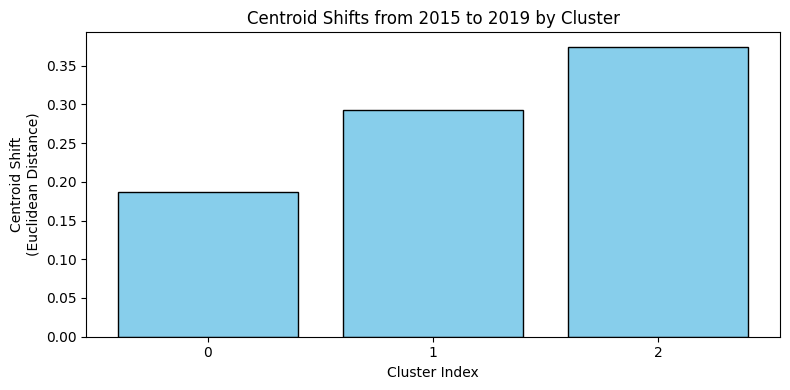

In [ ]:
clust_list  = list(range(number_of_clusters_2015))
plt.figure(figsize=(8, 4))
plt.bar(clust_list, cent_shift, color='skyblue', edgecolor='k')
plt.xlabel('Cluster Index')
plt.ylabel('Centroid Shift\n(Euclidean Distance)')
plt.title('Centroid Shifts from 2015 to 2019 by Cluster')
plt.xticks(clust_list)
plt.tight_layout()
plt.show()

**b. Cluster membership changes over time**

In [ ]:

country_list_2015 = outlier_removed_2015["Country"].tolist()
country_list_2019 = outlier_removed_2019["Country"].tolist()

happy_data_2015_labeled = pd.DataFrame({"Country": country_list_2015, "country_15": clusters_2015})
happy_data_2019_labeled = pd.DataFrame({"Country": country_list_2019, "country_19": clusters_2019_matched})

data_2015_2019 = happy_data_2015_labeled.merge(happy_data_2019_labeled, on="Country", how="inner")
data_2015_2019["Moved"] = data_2015_2019["country_15"] != data_2015_2019["country_19"]

print(f"Countries moved clusters: {data_2015_2019['Moved'].sum()} of {len(data_2015_2019)}")

print(data_2015_2019.pivot_table(index="country_15", columns="country_19", aggfunc="size", fill_value=0))

Countries moved clusters: 13 of 146
country_19   0   1   2
country_15            
0           64   1   0
1            5  47   0
2            6   1  22


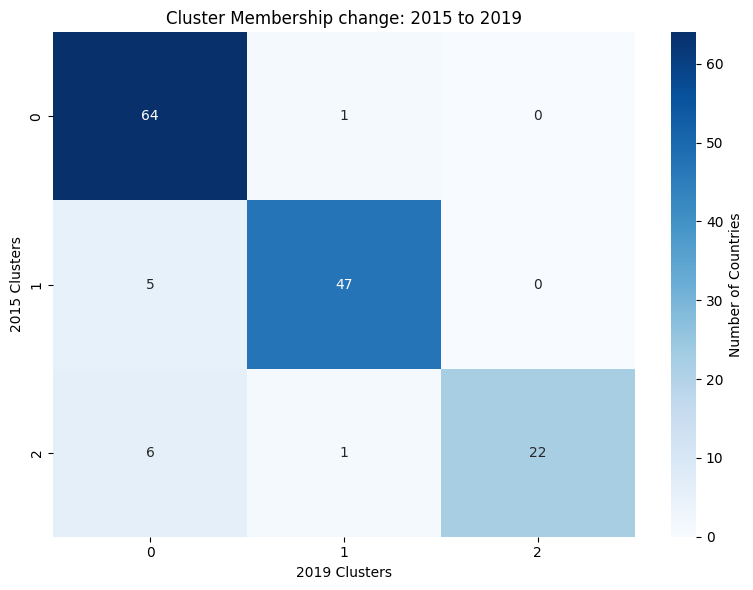

In [ ]:
membership_change = data_2015_2019.pivot_table(index="country_15", columns="country_19", aggfunc="size", fill_value=0)

plt.figure(figsize=(8,6))
sns.heatmap(
    membership_change,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar_kws={"label": "Number of Countries"}
)
plt.title("Cluster Membership change: 2015 to 2019")
plt.xlabel("2019 Clusters")
plt.ylabel("2015 Clusters")
plt.tight_layout()
plt.show()

The above image depicts country movements between clusters from 2015 (rows) to 2019 (columns). On the diagonal 64, 47, and 2 values are the counts of nations that remained in clusters 0, 1, and 2, respectively, demonstrating high stability in each group.The off-diagonal entries sum to 13, matching the 13 of 146 countries that switched clusters, which signals moderate structural drift over the four years .Such a matrix is a standard way to capture cluster evolution (or “concept drift”) in time-series clustering analyses, offering a clear, quantitative snapshot of how group membership has changed.



**2. Use Kullback-Leibler (KL) Divergence or other suitable metrics to quantify drift.**


---



In [ ]:
hist15, _ = np.histogram(clusters_2015, bins=range(k+1), density=True)
hist19, _ = np.histogram(clusters_2019_matched, bins=range(k+1), density=True)
kull_back = entropy(hist15, hist19)
print(f"Kullback-Leibler Divergence between distributions: {kull_back:.4f}")


Kullback-Leibler Divergence between distributions: 0.0151


### **6.Visualization of Results using PCA**

In [ ]:
def get_pca_plots_happy_clusters(year_scaled_data, cluster, country_list, yr):
    pca = PCA(n_components=2)
    pcs = pca.fit_transform(year_scaled_data)
    plot_df_pca = pd.DataFrame(pcs, columns=["PC1","PC2"])
    plot_df_pca["Cluster"] = cluster
    plot_df_pca["Country"] = country_list

    fig = pex.scatter(
        plot_df_pca, x="PC1", y="PC2", color="Cluster",
        hover_name="Country", title=f"{yr} PCA Clusters",
        labels={"PC1":"PC1", "PC2":"PC2"}
    )
    fig.update_traces(marker=dict(size=8, line=dict(width=1)))
    fig.show()

get_pca_plots_happy_clusters(scaled_2015, clusters_2015, country_list_2015, 2015)
get_pca_plots_happy_clusters(scaled_2019, clusters_2019_matched, country_list_2019, 2019)

### **7.Conclusion and Insights**

In [ ]:
print("\n===Summary ===")
print(f"Optimal k (both years): {k}")
print("Centroid shifts:", cent_shift)
print(f"Countries moved clusters: {data_2015_2019['Moved'].sum()} / {len(data_2015_2019)}")
print(f"Kullback-Leibler Divergence: {kull_back:.4f}")


print("\n===Feature diffrence Cluster 0 ===")
diffCl0 = cent_of_happy_data_2019[0] - cent_of_happy_data_2015[0]
for feature0, d in zip(numeric_cols_2015_renamed, diffCl0):
    print(f"{feature0}: {d:.3f}")


print("\n===Feature diffrence Cluster 1 ===")
diffCl1 = cent_of_happy_data_2019[1] - cent_of_happy_data_2015[1]
for feature1, d in zip(numeric_cols_2015_renamed, diffCl1):
    print(f"{feature1}: {d:.3f}")



print("\n===Feature diffrence Cluster 2 ===")
diffCl2 = cent_of_happy_data_2019[2] - cent_of_happy_data_2015[2]
for feature2, d in zip(numeric_cols_2015_renamed, diffCl2):
    print(f"{feature2}: {d:.3f}")


===Summary ===
Optimal k (both years): 3
Centroid shifts: [0.18642612572302084, 0.2923326718713498, 0.3742803328422228]
Countries moved clusters: 13 / 146
Kullback-Leibler Divergence: 0.0151

===Feature diffrence Cluster 0 ===
Score: -0.084
GDP per capita: 0.011
Social support: -0.009
Healthy life expectancy: -0.013
Freedom to make life choices: -0.086
Perceptions of corruption: 0.008
Generosity: -0.141

===Feature diffrence Cluster 1 ===
Score: -0.094
GDP per capita: -0.027
Social support: -0.141
Healthy life expectancy: -0.133
Freedom to make life choices: -0.023
Perceptions of corruption: 0.134
Generosity: 0.141

===Feature diffrence Cluster 2 ===
Score: 0.111
GDP per capita: 0.095
Social support: 0.004
Healthy life expectancy: 0.246
Freedom to make life choices: -0.042
Perceptions of corruption: 0.235
Generosity: -0.038
